# Linear Regression with Statsmodels for Movie Revenue

## Create a Linear Regression Model with Statsmodels for Revenue

- Task to do in this notebook
    - Use data from TMDB API for years available years 
    - Prepare the data for modeling
        - Some feature engineering
        - Usual Preprocessing
        - Statsmodels
    - Fit a statsmodels linear regression
    - Inspect the model summary
    - Create the visualizations to check assumptions about the residuals
    - Iterate model 
    - Check violations of the assumptions
    - Use coefficients to make stakeholder recommendations

## Loading the Data

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',100)

### 📚 Finding & Loading Batches of Files with `glob`

In [3]:
## Checking what data we already in our Data folder using os.listdir
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'movie_reviews.csv',
 'nlp',
 'processed-nlp-data.joblib',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_api_results_2003.j

In [5]:
## Try loading in the first .csv.gz file from the list
#pd.read_csv(file_list[1])

> Why isn't it working?

In [6]:
## let's check the filepath 
file_list[1]

'final_tmdb_data_2000.csv.gz'

In [7]:
## add the folder plus filename
FOLDER+ file_list[1]

'Data/final_tmdb_data_2000.csv.gz'

In [8]:
## try read csv with folder plus filename
# pd.read_csv(FOLDER+ file_list[1])

- Now we would do that in a loop, and only want to open .csv.gz.
- But there is a better way!
>- Introducing `glob`
    - Glob takes a filepath/query and will find every filename that matches the pattern provided.
    - We use asterisks as wildcards in our query.
    


In [9]:
import glob
## Make a filepath query
q = FOLDER+"*.csv.gz"
print(q)

Data/*.csv.gz


In [10]:
# Use glob.glob to get COMPLETE filepaths
file_list = glob.glob(q)
file_list

['Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/title_basics_cleaned.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2020.csv.gz',
 'Data/title_ratings_cleaned.csv.gz',
 'Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2021.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/title_akas_cleaned.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz']

In [11]:
# Use glob.glob to get COMPLETE filepaths
q = FOLDER+"final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data/final_*.csv.gz


['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz',
 'Data/final_tmdb_data_2020.csv.gz',
 'Data/final_tmdb_data_2021.csv.gz']

> But where are the rest of the years?

In [13]:
## in a sub-folder
#os.listdir(FOLDER+'2010-2021')

- Recursive Searching with glob.
    - add a `**/` in the middle of your query to grab any matches from all subfolders. 

In [14]:
# Use glob.glob to get COMPLETE filepaths
q = FOLDER+"/**/final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q,recursive=True))
file_list

Data//**/final_*.csv.gz


['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz',
 'Data/final_tmdb_data_2020.csv.gz',
 'Data/final_tmdb_data_2021.csv.gz']

In [15]:
# ## use a list comprehension to load in all files into 1 dataframe
# df = pd.concat([pd.read_csv(f) for f in file_list])
# df

- Dealing with ParserErrors with "possibly malformed files"

    - for a reason I do not fully understand yet, some of the files I downloaded error if I try to read them.
        - "ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.`
    - After some googling, the fix was to add `lineterminator='\n'` to pd.read_csv


In [16]:
## use a list comprehension to load in all files into 1 dataframe
df = pd.concat([pd.read_csv(f,lineterminator='\n') for f in file_list])
df

imdb_id  adult                     backdrop_path  \
0             0    NaN                               NaN   
1     tt0113026    0.0  /vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg   
2     tt0113092    0.0                               NaN   
3     tt0116391    0.0                               NaN   
4     tt0116748    0.0  /wr0hTHwkYIRC82MwNbhOvqrw27N.jpg   
...         ...    ...                               ...   
5716  tt9895024    0.0   /S1kutYyoyuBJKGS0mXxv2fZNbr.jpg   
5717  tt9896876    0.0  /hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg   
5718  tt9898844    0.0  /5CyeeUJ7OG55fknaeNA7UPLhUDA.jpg   
5719  tt9900940    0.0  /3jjWLg5bevWqReyVroYqxwVrH0k.jpg   
5720  tt9907782    0.0  /hPurpFeAkvkvWYRVSDYGDaDSgva.jpg   

     belongs_to_collection      budget  \
0                      NaN         NaN   
1                      NaN  10000000.0   
2                      NaN         0.0   
3                      NaN         0.0   
4                      NaN         0.0   
...                    ...         ...   
5716                   NaN         0.0   
5717                   NaN         0.0   
5718                   NaN         0.0   
5719                   NaN         0.0   
5720                   NaN         0.0   

                                                 genres homepage        id  \
0                                                   NaN      NaN       NaN   
1     [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...      NaN   62127.0   
2              [{'id': 878, 'name': 'Science Fiction'}]      NaN  110977.0   
3     [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...      NaN  442869.0   
4     [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      NaN  579396.0   
...                                                 ...      ...       ...   
5716  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...      NaN  834443.0   
5717  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...      NaN  821493.0   
5718                     [{'id': 27, 'name': 'Horror'}]      NaN  870671.0   
5719  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...      NaN  861294.0   
5720  [{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...      NaN  630392.0   

     original_language           original_title  \
0                  NaN                      NaN   
1                   en          The Fantasticks   
2                   en            For the Cause   
3                   hi                     Gang   
4                   hi                 Karobaar   
...                ...                      ...   
5716                de              Heikos Welt   
5717                en  India Sweets and Spices   
5718                en              The Hunting   
5719                en             The Scrapper   
5720                en               The Cursed   

                                               overview  popularity  \
0                                                   NaN         NaN   
1     Two rural teens sing and dance their way throu...       2.838   
2     Earth is in a state of constant war and two co...       2.410   
3     After falling prey to underworld, four friends...       0.655   
4     Wealthy Rajiv Sinha and middle-classed Amar Sa...       0.600   
...                                                 ...         ...   
5716  A son tries to save his mother's eyesight by d...       2.211   
5717  A college freshman confronts her parents’ valu...       7.577   
5718  When a mysterious animal attack leaves a mutil...      23.220   
5719  Ex-con turned "scrapper" Jake leads a quiet li...      23.406   
5720  In the late 19th century, a brutal land baron ...      14.168   

                           poster_path  \
0                                  NaN   
1     /hfO64mXz3DgUxkBVU7no2UWRP7x.jpg   
2     /h9bWO13nWRGZJo4XVPiElXyrRMU.jpg   
3     /yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg   
4     /wFSOXXrJklY2ngjIJCus9c2DfJW.jpg   
...                                ...   
5716  /u2rxIUdUoCkm8gDfYPnFEHS4OLp.jpg   
5717  /2cUczTzLq1F99Pgiw6BWFsKnD7J.jpg   
5

In [17]:
# remove ids that are 0
df = df.loc[ df['imdb_id']!='0']
df

imdb_id  adult                     backdrop_path  \
1     tt0113026    0.0  /vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg   
2     tt0113092    0.0                               NaN   
3     tt0116391    0.0                               NaN   
4     tt0116748    0.0  /wr0hTHwkYIRC82MwNbhOvqrw27N.jpg   
5     tt0118694    0.0  /n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg   
...         ...    ...                               ...   
5716  tt9895024    0.0   /S1kutYyoyuBJKGS0mXxv2fZNbr.jpg   
5717  tt9896876    0.0  /hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg   
5718  tt9898844    0.0  /5CyeeUJ7OG55fknaeNA7UPLhUDA.jpg   
5719  tt9900940    0.0  /3jjWLg5bevWqReyVroYqxwVrH0k.jpg   
5720  tt9907782    0.0  /hPurpFeAkvkvWYRVSDYGDaDSgva.jpg   

     belongs_to_collection      budget  \
1                      NaN  10000000.0   
2                      NaN         0.0   
3                      NaN         0.0   
4                      NaN         0.0   
5                      NaN    150000.0   
...                    ...         ...   
5716                   NaN         0.0   
5717                   NaN         0.0   
5718                   NaN         0.0   
5719                   NaN         0.0   
5720                   NaN         0.0   

                                                 genres  \
1     [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
2              [{'id': 878, 'name': 'Science Fiction'}]   
3     [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...   
4     [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
5     [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
...                                                 ...   
5716  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...   
5717  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
5718                     [{'id': 27, 'name': 'Horror'}]   
5719  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   
5720  [{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...   

                                  homepage        id original_language  \
1                                      NaN   62127.0                en   
2                                      NaN  110977.0                en   
3                                      NaN  442869.0                hi   
4                                      NaN  579396.0                hi   
5     http://www.wkw-inthemoodforlove.com/     843.0                cn   
...                                    ...       ...               ...   
5716                                   NaN  834443.0                de   
5717                                   NaN  821493.0                en   
5718                                   NaN  870671.0                en   
5719                                   NaN  861294.0                en   
5720                                   NaN  630392.0                en   

               original_title  \
1             The Fantasticks   
2               For the Cause   
3                        Gang   
4                    Karobaar   
5                        花樣年華   
...                       ...   
5716              Heikos Welt   
5717  India Sweets and Spices   
5718              The Hunting   
5719             The Scrapper   
5720               The Cursed   

                                               overview  popularity  \
1     Two rural teens sing and dance their way throu...       2.838   
2     Earth is in a state of constant war and two co...       2.410   
3     After falling prey to underworld, four friends...       0.655   
4     Wealthy Rajiv Sinha and middle-classed Amar Sa...       0.600   
5     Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...      21.023   
...                                                 ...         ...   
5716  A son tries to save his mother's eyesight by d...       2.211   
5717  A college freshman confronts her parents’ valu...       7.577   
5718  When a mysterious animal attack leaves a mutil...      23.220   
5719  Ex-con turned "scrapper" Jake leads a quiet li...      23.406   
5720  

In [18]:
df = df.reset_index(drop=True)
df

imdb_id  adult                     backdrop_path  \
0      tt0113026    0.0  /vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg   
1      tt0113092    0.0                               NaN   
2      tt0116391    0.0                               NaN   
3      tt0116748    0.0  /wr0hTHwkYIRC82MwNbhOvqrw27N.jpg   
4      tt0118694    0.0  /n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg   
...          ...    ...                               ...   
98465  tt9895024    0.0   /S1kutYyoyuBJKGS0mXxv2fZNbr.jpg   
98466  tt9896876    0.0  /hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg   
98467  tt9898844    0.0  /5CyeeUJ7OG55fknaeNA7UPLhUDA.jpg   
98468  tt9900940    0.0  /3jjWLg5bevWqReyVroYqxwVrH0k.jpg   
98469  tt9907782    0.0  /hPurpFeAkvkvWYRVSDYGDaDSgva.jpg   

      belongs_to_collection      budget  \
0                       NaN  10000000.0   
1                       NaN         0.0   
2                       NaN         0.0   
3                       NaN         0.0   
4                       NaN    150000.0   
...                     ...         ...   
98465                   NaN         0.0   
98466                   NaN         0.0   
98467                   NaN         0.0   
98468                   NaN         0.0   
98469                   NaN         0.0   

                                                  genres  \
0      [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1               [{'id': 878, 'name': 'Science Fiction'}]   
2      [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...   
3      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
4      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
...                                                  ...   
98465  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...   
98466  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
98467                     [{'id': 27, 'name': 'Horror'}]   
98468  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   
98469  [{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...   

                                   homepage        id original_language  \
0                                       NaN   62127.0                en   
1                                       NaN  110977.0                en   
2                                       NaN  442869.0                hi   
3                                       NaN  579396.0                hi   
4      http://www.wkw-inthemoodforlove.com/     843.0                cn   
...                                     ...       ...               ...   
98465                                   NaN  834443.0                de   
98466                                   NaN  821493.0                en   
98467                                   NaN  870671.0                en   
98468                                   NaN  861294.0                en   
98469                                   NaN  630392.0                en   

                original_title  \
0              The Fantasticks   
1                For the Cause   
2                         Gang   
3                     Karobaar   
4                         花樣年華   
...                        ...   
98465              Heikos Welt   
98466  India Sweets and Spices   
98467              The Hunting   
98468             The Scrapper   
98469               The Cursed   

                                                overview  popularity  \
0      Two rural teens sing and dance their way throu...       2.838   
1      Earth is in a state of constant war and two co...       2.410   
2      After falling prey to underworld, four friends...       0.655   
3      Wealthy Rajiv Sinha and middle-classed Amar Sa...       0.600   
4      Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...      21.023   
...                                                  ...         ...   
98465  A son tries to save his mother's eyesight by d...       2.211   
98466  A college freshman confronts her parents’ valu...       7.577   
98467  When a mysterious animal attack leaves a mutil...      23.220   
98468  E

In [19]:
## saving the combined csv to disk
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz',compression='gzip',index=False)

df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df

imdb_id  adult                     backdrop_path  \
0      tt0113026    0.0  /vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg   
1      tt0113092    0.0                               NaN   
2      tt0116391    0.0                               NaN   
3      tt0116748    0.0  /wr0hTHwkYIRC82MwNbhOvqrw27N.jpg   
4      tt0118694    0.0  /n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg   
...          ...    ...                               ...   
98465  tt9895024    0.0   /S1kutYyoyuBJKGS0mXxv2fZNbr.jpg   
98466  tt9896876    0.0  /hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg   
98467  tt9898844    0.0  /5CyeeUJ7OG55fknaeNA7UPLhUDA.jpg   
98468  tt9900940    0.0  /3jjWLg5bevWqReyVroYqxwVrH0k.jpg   
98469  tt9907782    0.0  /hPurpFeAkvkvWYRVSDYGDaDSgva.jpg   

      belongs_to_collection      budget  \
0                       NaN  10000000.0   
1                       NaN         0.0   
2                       NaN         0.0   
3                       NaN         0.0   
4                       NaN    150000.0   
...                     ...         ...   
98465                   NaN         0.0   
98466                   NaN         0.0   
98467                   NaN         0.0   
98468                   NaN         0.0   
98469                   NaN         0.0   

                                                  genres  \
0      [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1               [{'id': 878, 'name': 'Science Fiction'}]   
2      [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...   
3      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
4      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
...                                                  ...   
98465  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...   
98466  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
98467                     [{'id': 27, 'name': 'Horror'}]   
98468  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   
98469  [{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...   

                                   homepage        id original_language  \
0                                       NaN   62127.0                en   
1                                       NaN  110977.0                en   
2                                       NaN  442869.0                hi   
3                                       NaN  579396.0                hi   
4      http://www.wkw-inthemoodforlove.com/     843.0                cn   
...                                     ...       ...               ...   
98465                                   NaN  834443.0                de   
98466                                   NaN  821493.0                en   
98467                                   NaN  870671.0                en   
98468                                   NaN  861294.0                en   
98469                                   NaN  630392.0                en   

                original_title  \
0              The Fantasticks   
1                For the Cause   
2                         Gang   
3                     Karobaar   
4                         花樣年華   
...                        ...   
98465              Heikos Welt   
98466  India Sweets and Spices   
98467              The Hunting   
98468             The Scrapper   
98469               The Cursed   

                                                overview  popularity  \
0      Two rural teens sing and dance their way throu...       2.838   
1      Earth is in a state of constant war and two co...       2.410   
2      After falling prey to underworld, four friends...       0.655   
3      Wealthy Rajiv Sinha and middle-classed Amar Sa...       0.600   
4      Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...      21.023   
...                                                  ...         ...   
98465  A son tries to save his mother's eyesight by d...       2.211   
98466  A college freshman confronts her parents’ valu...       7.577   
98467  When a mysterious animal attack leaves a mutil...      23.220   
98468  E

## Preprocessing

In [20]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', 'status',
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

imdb_id  adult belongs_to_collection      budget  \
0      tt0113026    0.0                   NaN  10000000.0   
1      tt0113092    0.0                   NaN         0.0   
2      tt0116391    0.0                   NaN         0.0   
3      tt0116748    0.0                   NaN         0.0   
4      tt0118694    0.0                   NaN    150000.0   
...          ...    ...                   ...         ...   
98465  tt9895024    0.0                   NaN         0.0   
98466  tt9896876    0.0                   NaN         0.0   
98467  tt9898844    0.0                   NaN         0.0   
98468  tt9900940    0.0                   NaN         0.0   
98469  tt9907782    0.0                   NaN         0.0   

                                                  genres  popularity  \
0      [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...       2.838   
1               [{'id': 878, 'name': 'Science Fiction'}]       2.410   
2      [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...       0.655   
3      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...       0.600   
4      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      21.023   
...                                                  ...         ...   
98465  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...       2.211   
98466  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...       7.577   
98467                     [{'id': 27, 'name': 'Horror'}]      23.220   
98468  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...      23.406   
98469  [{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...      14.168   

                                    production_companies release_date  \
0      [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...   2000-09-22   
1      [{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...   2000-11-15   
2                                                     []   2000-04-14   
3                                                     []   2000-09-15   
4      [{'id': 539, 'logo_path': None, 'name': 'Block...   2000-09-29   
...                                                  ...          ...   
98465  [{'id': 154995, 'logo_path': None, 'name': 'AS...   2021-09-08   
98466  [{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...   2021-11-19   
98467  [{'id': 160303, 'logo_path': None, 'name': 'Mo...   2022-01-21   
98468  [{'id': 91999, 'logo_path': None, 'name': 'Luc...   2021-12-07   
98469  [{'id': 26065, 'logo_path': None, 'name': 'Pis...   2021-07-28   

          revenue  runtime                    title  vote_average  vote_count  \
0             0.0     86.0          The Fantasticks         5.500        22.0   
1             0.0    100.0            For the Cause         5.100         8.0   
2             0.0    152.0                     Gang         0.000         0.0   
3             0.0    180.0                 Karobaar         5.500         2.0   
4      12854953.0     99.0     In the Mood for Love         8.111      1979.0   
...           ...      ...                      ...           ...         ...   
98465         0.0    118.0            Heiko's World         6.400         4.0   
98466    283643.0    101.0  India Sweets and Spices         5.800        13.0   
98467         0.0     91.0              The Hunting         5.569        65.0   
98468         0.0     87.0             The Scrapper         5.250         3.0   
98469   4588389.0    111.0               The Cursed         6.740       233.0   

      certification  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4                PG  
...             ...  
98465           NaN  
98466         PG-13  
98467           NaN  
98468           NaN  
98469           NaN  

[98470 rows x 14 columns]

### Feature Engineering


- Collection: convert to boolean
- Genres: get just name and OHE
- Cleaning Certification
- Converting release date to year, month, and day.

#### belongs to collection

In [21]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].notna().sum()

5951

In [22]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    92519
True      5951
Name: belongs_to_collection, dtype: int64

#### genre

In [23]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [24]:
## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode

imdb_id  adult  belongs_to_collection      budget  \
0      tt0113026    0.0                  False  10000000.0   
0      tt0113026    0.0                  False  10000000.0   
0      tt0113026    0.0                  False  10000000.0   
1      tt0113092    0.0                  False         0.0   
2      tt0116391    0.0                  False         0.0   
...          ...    ...                    ...         ...   
98468  tt9900940    0.0                  False         0.0   
98468  tt9900940    0.0                  False         0.0   
98469  tt9907782    0.0                  False         0.0   
98469  tt9907782    0.0                  False         0.0   
98469  tt9907782    0.0                  False         0.0   

                                                  genres  popularity  \
0      [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...       2.838   
0      [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...       2.838   
0      [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...       2.838   
1               [{'id': 878, 'name': 'Science Fiction'}]       2.410   
2      [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...       0.655   
...                                                  ...         ...   
98468  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...      23.406   
98468  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...      23.406   
98469  [{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...      14.168   
98469  [{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...      14.168   
98469  [{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...      14.168   

                                    production_companies release_date  \
0      [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...   2000-09-22   
0      [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...   2000-09-22   
0      [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...   2000-09-22   
1      [{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...   2000-11-15   
2                                                     []   2000-04-14   
...                                                  ...          ...   
98468  [{'id': 91999, 'logo_path': None, 'name': 'Luc...   2021-12-07   
98468  [{'id': 91999, 'logo_path': None, 'name': 'Luc...   2021-12-07   
98469  [{'id': 26065, 'logo_path': None, 'name': 'Pis...   2021-07-28   
98469  [{'id': 26065, 'logo_path': None, 'name': 'Pis...   2021-07-28   
98469  [{'id': 26065, 'logo_path': None, 'name': 'Pis...   2021-07-28   

         revenue  runtime            title  vote_average  vote_count  \
0            0.0     86.0  The Fantasticks          5.50        22.0   
0            0.0     86.0  The Fantasticks          5.50        22.0   
0            0.0     86.0  The Fantasticks          5.50        22.0   
1            0.0    100.0    For the Cause          5.10         8.0   
2            0.0    152.0             Gang          0.00         0.0   
...          ...      ...              ...           ...         ...   
98468        0.0     87.0     The Scrapper          5.25         3.0   
98468        0.0     87.0     The Scrapper          5.25         3.0   
98469  4588389.0    111.0       The Cursed          6.74       233.0   
98469  4588389.0    111.0       The Cursed          6.74       233.0   
98469  4588389.0    111.0       The Cursed          6.74       233.0   

      certification      genres_list  
0               NaN           Comedy  
0               NaN            Music  
0               NaN          Romance  
1               NaN  Science Fiction  
2               NaN            Drama  
...             ...              ...  
98468           NaN            Drama  
98468           NaN         Thriller  
98469           NaN           Horror  
98469           NaN            Drama  
98469           NaN         Thriller  

[174719 rows x 15 columns]

In [25]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Thriller', 'Horror',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [26]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df

imdb_id  adult  belongs_to_collection      budget  \
0      tt0113026    0.0                  False  10000000.0   
1      tt0113092    0.0                  False         0.0   
2      tt0116391    0.0                  False         0.0   
3      tt0116748    0.0                  False         0.0   
4      tt0118694    0.0                  False    150000.0   
...          ...    ...                    ...         ...   
98465  tt9895024    0.0                  False         0.0   
98466  tt9896876    0.0                  False         0.0   
98467  tt9898844    0.0                  False         0.0   
98468  tt9900940    0.0                  False         0.0   
98469  tt9907782    0.0                  False         0.0   

                                                  genres  popularity  \
0      [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...       2.838   
1               [{'id': 878, 'name': 'Science Fiction'}]       2.410   
2      [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...       0.655   
3      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...       0.600   
4      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      21.023   
...                                                  ...         ...   
98465  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...       2.211   
98466  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...       7.577   
98467                     [{'id': 27, 'name': 'Horror'}]      23.220   
98468  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...      23.406   
98469  [{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...      14.168   

                                    production_companies release_date  \
0      [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...   2000-09-22   
1      [{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...   2000-11-15   
2                                                     []   2000-04-14   
3                                                     []   2000-09-15   
4      [{'id': 539, 'logo_path': None, 'name': 'Block...   2000-09-29   
...                                                  ...          ...   
98465  [{'id': 154995, 'logo_path': None, 'name': 'AS...   2021-09-08   
98466  [{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...   2021-11-19   
98467  [{'id': 160303, 'logo_path': None, 'name': 'Mo...   2022-01-21   
98468  [{'id': 91999, 'logo_path': None, 'name': 'Luc...   2021-12-07   
98469  [{'id': 26065, 'logo_path': None, 'name': 'Pis...   2021-07-28   

          revenue  runtime                    title  vote_average  vote_count  \
0             0.0     86.0          The Fantasticks         5.500        22.0   
1             0.0    100.0            For the Cause         5.100         8.0   
2             0.0    152.0                     Gang         0.000         0.0   
3             0.0    180.0                 Karobaar         5.500         2.0   
4      12854953.0     99.0     In the Mood for Love         8.111      1979.0   
...           ...      ...                      ...           ...         ...   
98465         0.0    118.0            Heiko's World         6.400         4.0   
98466    283643.0    101.0  India Sweets and Spices         5.800        13.0   
98467         0.0     91.0              The Hunting         5.569        65.0   
98468         0.0     87.0             The Scrapper         5.250         3.0   
98469   4588389.0    111.0               The Cursed         6.740       233.0   

      certification                genres_list  Genre_Comedy  Genre_Music  \
0               NaN   [Comedy, Music, Romance]          True         True   
1               NaN          [Science Fiction]         False        False   
2               NaN     [Drama, Action, Crime]         False        False   
3               NaN           [Drama, Romance]         False        False   
4                PG           [Drama, Romance]         False        False   
...             ...                        ...           ...          ...   
98465     

In [27]:
## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])
df

imdb_id  adult  belongs_to_collection      budget  popularity  \
0      tt0113026    0.0                  False  10000000.0       2.838   
1      tt0113092    0.0                  False         0.0       2.410   
2      tt0116391    0.0                  False         0.0       0.655   
3      tt0116748    0.0                  False         0.0       0.600   
4      tt0118694    0.0                  False    150000.0      21.023   
...          ...    ...                    ...         ...         ...   
98465  tt9895024    0.0                  False         0.0       2.211   
98466  tt9896876    0.0                  False         0.0       7.577   
98467  tt9898844    0.0                  False         0.0      23.220   
98468  tt9900940    0.0                  False         0.0      23.406   
98469  tt9907782    0.0                  False         0.0      14.168   

                                    production_companies release_date  \
0      [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...   2000-09-22   
1      [{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...   2000-11-15   
2                                                     []   2000-04-14   
3                                                     []   2000-09-15   
4      [{'id': 539, 'logo_path': None, 'name': 'Block...   2000-09-29   
...                                                  ...          ...   
98465  [{'id': 154995, 'logo_path': None, 'name': 'AS...   2021-09-08   
98466  [{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...   2021-11-19   
98467  [{'id': 160303, 'logo_path': None, 'name': 'Mo...   2022-01-21   
98468  [{'id': 91999, 'logo_path': None, 'name': 'Luc...   2021-12-07   
98469  [{'id': 26065, 'logo_path': None, 'name': 'Pis...   2021-07-28   

          revenue  runtime                    title  vote_average  vote_count  \
0             0.0     86.0          The Fantasticks         5.500        22.0   
1             0.0    100.0            For the Cause         5.100         8.0   
2             0.0    152.0                     Gang         0.000         0.0   
3             0.0    180.0                 Karobaar         5.500         2.0   
4      12854953.0     99.0     In the Mood for Love         8.111      1979.0   
...           ...      ...                      ...           ...         ...   
98465         0.0    118.0            Heiko's World         6.400         4.0   
98466    283643.0    101.0  India Sweets and Spices         5.800        13.0   
98467         0.0     91.0              The Hunting         5.569        65.0   
98468         0.0     87.0             The Scrapper         5.250         3.0   
98469   4588389.0    111.0               The Cursed         6.740       233.0   

      certification  Genre_Comedy  Genre_Music  Genre_Romance  \
0               NaN          True         True           True   
1               NaN         False        False          False   
2               NaN         False        False          False   
3               NaN         False        False           True   
4                PG         False        False           True   
...             ...           ...          ...            ...   
98465           NaN          True        False          False   
98466         PG-13          True        False           True   
98467           NaN         False        False          False   
98468           NaN         False        False          False   
98469           NaN         False        False          False   

       Genre_Science Fiction  Genre_Drama  Genre_Action  Genre_Crime  \
0                      False        False         False        False   
1                       True        False         False        False   
2                      False         True          True         True   
3                      False         True         False        False   
4                      False         True         False        False   
...                      ...          ...           ...  

#### certification

In [28]:
## Checking Certification values
df['certification'].value_counts(dropna=False)

NaN        83390
R           5950
NR          3743
PG-13       3189
PG          1493
G            485
NC-17        215
Unrated        2
PG-13          2
-              1
Name: certification, dtype: int64

In [29]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()

In [30]:
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      83390
R         5950
NR        3746
PG-13     3191
PG        1493
G          485
NC-17      215
Name: certification, dtype: int64

#### Converting year to sep features

In [31]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df

imdb_id  adult  belongs_to_collection      budget  popularity  \
0      tt0113026    0.0                  False  10000000.0       2.838   
1      tt0113092    0.0                  False         0.0       2.410   
2      tt0116391    0.0                  False         0.0       0.655   
3      tt0116748    0.0                  False         0.0       0.600   
4      tt0118694    0.0                  False    150000.0      21.023   
...          ...    ...                    ...         ...         ...   
98465  tt9895024    0.0                  False         0.0       2.211   
98466  tt9896876    0.0                  False         0.0       7.577   
98467  tt9898844    0.0                  False         0.0      23.220   
98468  tt9900940    0.0                  False         0.0      23.406   
98469  tt9907782    0.0                  False         0.0      14.168   

                                    production_companies release_date  \
0      [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...   2000-09-22   
1      [{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...   2000-11-15   
2                                                     []   2000-04-14   
3                                                     []   2000-09-15   
4      [{'id': 539, 'logo_path': None, 'name': 'Block...   2000-09-29   
...                                                  ...          ...   
98465  [{'id': 154995, 'logo_path': None, 'name': 'AS...   2021-09-08   
98466  [{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...   2021-11-19   
98467  [{'id': 160303, 'logo_path': None, 'name': 'Mo...   2022-01-21   
98468  [{'id': 91999, 'logo_path': None, 'name': 'Luc...   2021-12-07   
98469  [{'id': 26065, 'logo_path': None, 'name': 'Pis...   2021-07-28   

          revenue  runtime                    title  vote_average  vote_count  \
0             0.0     86.0          The Fantasticks         5.500        22.0   
1             0.0    100.0            For the Cause         5.100         8.0   
2             0.0    152.0                     Gang         0.000         0.0   
3             0.0    180.0                 Karobaar         5.500         2.0   
4      12854953.0     99.0     In the Mood for Love         8.111      1979.0   
...           ...      ...                      ...           ...         ...   
98465         0.0    118.0            Heiko's World         6.400         4.0   
98466    283643.0    101.0  India Sweets and Spices         5.800        13.0   
98467         0.0     91.0              The Hunting         5.569        65.0   
98468         0.0     87.0             The Scrapper         5.250         3.0   
98469   4588389.0    111.0               The Cursed         6.740       233.0   

      certification  Genre_Comedy  Genre_Music  Genre_Romance  \
0               NaN          True         True           True   
1               NaN         False        False          False   
2               NaN         False        False          False   
3               NaN         False        False           True   
4                PG         False        False           True   
...             ...           ...          ...            ...   
98465           NaN          True        False          False   
98466         PG-13          True        False           True   
98467           NaN         False        False          False   
98468           NaN         False        False          False   
98469           NaN         False        False          False   

       Genre_Science Fiction  Genre_Drama  Genre_Action  Genre_Crime  \
0                      False        False         False        False   
1                       True        False         False        False   
2                      False         True          True         True   
3                      False         True         False        False   
4                      False         True         False        False   
...                      ...          ...           ...  

In [32]:
df[df['release_date'].isna()]

imdb_id  adult  belongs_to_collection  budget  popularity  \
134    tt0164182    0.0                  False     0.0       0.600   
341    tt0194519    0.0                  False     0.0       0.600   
1105   tt0245759    0.0                  False     0.0       0.600   
1212   tt0250944    0.0                  False     0.0       0.600   
1254   tt0253521    0.0                  False     0.0       0.600   
...          ...    ...                    ...     ...         ...   
98126  tt8633430    0.0                  False     0.0       0.600   
98241  tt9145234    0.0                  False  2000.0       0.600   
98395  tt9680638    1.0                  False     0.0       0.000   
98408  tt9728202    0.0                  False     0.0       0.600   
98432  tt9788418    0.0                  False     0.0       0.993   

                                    production_companies release_date  \
134                                                   []          NaN   
341                                                   []          NaN   
1105                                                  []          NaN   
1212                                                  []          NaN   
1254                                                  []          NaN   
...                                                  ...          ...   
98126                                                 []          NaN   
98241                                                 []          NaN   
98395                                                 []          NaN   
98408  [{'id': 160882, 'logo_path': None, 'name': 'Ti...          NaN   
98432                                                 []          NaN   

       revenue  runtime                                    title  \
134        0.0      0.0                          The Stonecutter   
341        0.0     85.0                         We Married Margo   
1105       0.0     93.0                         Behind the Seams   
1212       0.0      0.0  The Adventures of Cinderella's Daughter   
1254       0.0    107.0               Quando una donna non dorme   
...        ...      ...                                      ...   
98126      0.0     98.0                             Kung Fu Girl   
98241      0.0     86.0                         Midnight Science   
98395      0.0    116.0                            Bhootha Kaala   
98408      0.0     83.0                                  Externo   
98432      0.0     90.0                           Mister Mayfair   

       vote_average  vote_count certification  Genre_Comedy  Genre_Music  \
134             0.0         0.0           NaN         False        False   
341             6.0         1.0           NaN          True        False   
1105            0.0         0.0           NaN         False        False   
1212            0.0         0.0           NaN         False        False   
1254            0.0         0.0           NaN         False        False   
...             ...         ...           ...           ...          ...   
98126           0.0         0.0           NaN         False        False   
98241           6.0         1.0           NaN         False        False   
98395           0.0         0.0           NaN         False        False   
98408           0.0         0.0           NaN         False        False   
98432           0.0         0.0           NaN         False        False   

       Genre_Romance  Genre_Science Fiction  Genre_Drama  Genre_Action  \
134            False                  False        False         False   
341            False                  False        False         False   
1105           False                  False        False         False   
1212           False                  False        False         False   
1254           False                  False        False         False   
...              ...                    ...          ...           ...   
98126          False                  False

In [33]:
## drop original feature
df = df.drop(columns=['release_date'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98470 entries, 0 to 98469
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                98470 non-null  object 
 1   adult                  98470 non-null  float64
 2   belongs_to_collection  98470 non-null  bool   
 3   budget                 98470 non-null  float64
 4   popularity             98470 non-null  float64
 5   production_companies   98470 non-null  object 
 6   revenue                98470 non-null  float64
 7   runtime                98470 non-null  float64
 8   title                  98470 non-null  object 
 9   vote_average           98470 non-null  float64
 10  vote_count             98470 non-null  float64
 11  certification          15080 non-null  object 
 12  Genre_Comedy           98470 non-null  bool   
 13  Genre_Music            98470 non-null  bool   
 14  Genre_Romance          98470 non-null  bool   
 15  Ge

## Train Test Split

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98470 entries, 0 to 98469
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                98470 non-null  object 
 1   adult                  98470 non-null  float64
 2   belongs_to_collection  98470 non-null  bool   
 3   budget                 98470 non-null  float64
 4   popularity             98470 non-null  float64
 5   production_companies   98470 non-null  object 
 6   revenue                98470 non-null  float64
 7   runtime                98470 non-null  float64
 8   title                  98470 non-null  object 
 9   vote_average           98470 non-null  float64
 10  vote_count             98470 non-null  float64
 11  certification          15080 non-null  object 
 12  Genre_Comedy           98470 non-null  bool   
 13  Genre_Music            98470 non-null  bool   
 14  Genre_Romance          98470 non-null  bool   
 15  Ge

In [36]:
df['production_companies']

0        [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...
1        [{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...
2                                                       []
3                                                       []
4        [{'id': 539, 'logo_path': None, 'name': 'Block...
                               ...                        
98465    [{'id': 154995, 'logo_path': None, 'name': 'AS...
98466    [{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...
98467    [{'id': 160303, 'logo_path': None, 'name': 'Mo...
98468    [{'id': 91999, 'logo_path': None, 'name': 'Luc...
98469    [{'id': 26065, 'logo_path': None, 'name': 'Pis...
Name: production_companies, Length: 98470, dtype: object

In [37]:
drop_for_model = ['title','imdb_id','production_companies']
df = df.drop(columns=drop_for_model)
df

adult  belongs_to_collection      budget  popularity     revenue  \
0        0.0                  False  10000000.0       2.838         0.0   
1        0.0                  False         0.0       2.410         0.0   
2        0.0                  False         0.0       0.655         0.0   
3        0.0                  False         0.0       0.600         0.0   
4        0.0                  False    150000.0      21.023  12854953.0   
...      ...                    ...         ...         ...         ...   
98465    0.0                  False         0.0       2.211         0.0   
98466    0.0                  False         0.0       7.577    283643.0   
98467    0.0                  False         0.0      23.220         0.0   
98468    0.0                  False         0.0      23.406         0.0   
98469    0.0                  False         0.0      14.168   4588389.0   

       runtime  vote_average  vote_count certification  Genre_Comedy  \
0         86.0         5.500        22.0           NaN          True   
1        100.0         5.100         8.0           NaN         False   
2        152.0         0.000         0.0           NaN         False   
3        180.0         5.500         2.0           NaN         False   
4         99.0         8.111      1979.0            PG         False   
...        ...           ...         ...           ...           ...   
98465    118.0         6.400         4.0           NaN          True   
98466    101.0         5.800        13.0         PG-13          True   
98467     91.0         5.569        65.0           NaN         False   
98468     87.0         5.250         3.0           NaN         False   
98469    111.0         6.740       233.0           NaN         False   

       Genre_Music  Genre_Romance  Genre_Science Fiction  Genre_Drama  \
0             True           True                  False        False   
1            False          False                   True        False   
2            False          False                  False         True   
3            False           True                  False         True   
4            False           True                  False         True   
...            ...            ...                    ...          ...   
98465        False          False                  False         True   
98466        False           True                  False         True   
98467        False          False                  False        False   
98468        False          False                  False         True   
98469        False          False                  False         True   

       Genre_Action  Genre_Crime  Genre_Adventure  Genre_Animation  \
0             False        False            False            False   
1             False        False            False            False   
2              True         True            False            False   
3             False        False            False            False   
4             False        False            False            False   
...             ...          ...              ...              ...   
98465         False        False            False            False   
98466         False        False            False            False   
98467         False        False            False            False   
98468         False         True            False            False   
98469         False        False            False            False   

       Genre_Fantasy  Genre_Thriller  Genre_Horror  Genre_History  \
0              False           False         False          False   
1              False           False         False          False   
2              False           False         False          False   
3              False           False         False          False   
4              False           False         False          False   
...              ...             ...           ...            ...   
98465          False           False    

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98470 entries, 0 to 98469
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  98470 non-null  float64
 1   belongs_to_collection  98470 non-null  bool   
 2   budget                 98470 non-null  float64
 3   popularity             98470 non-null  float64
 4   revenue                98470 non-null  float64
 5   runtime                98470 non-null  float64
 6   vote_average           98470 non-null  float64
 7   vote_count             98470 non-null  float64
 8   certification          15080 non-null  object 
 9   Genre_Comedy           98470 non-null  bool   
 10  Genre_Music            98470 non-null  bool   
 11  Genre_Romance          98470 non-null  bool   
 12  Genre_Science Fiction  98470 non-null  bool   
 13  Genre_Drama            98470 non-null  bool   
 14  Genre_Action           98470 non-null  bool   
 15  Ge

In [39]:
## Make x and y variables
y = df['revenue'].copy()
X = df.drop(columns=['revenue']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
X_train.head()

adult  belongs_to_collection      budget  popularity  runtime  \
26715    0.0                  False  24000000.0      15.456     94.0   
69980    0.0                  False         0.0       7.449    102.0   
78699    0.0                  False         0.0       2.517    107.0   
73577    0.0                  False         0.0       2.754     85.0   
28555    0.0                  False         0.0       3.407    118.0   

       vote_average  vote_count certification  Genre_Comedy  Genre_Music  \
26715         5.980      2084.0             R          True        False   
69980         5.492        65.0           NaN         False        False   
78699         2.000         2.0           NaN          True        False   
73577         8.400         4.0           NaN         False        False   
28555         7.083        24.0           NaN         False        False   

       Genre_Romance  Genre_Science Fiction  Genre_Drama  Genre_Action  \
26715          False                  False        False         False   
69980          False                  False         True         False   
78699           True                  False        False         False   
73577          False                  False        False         False   
28555          False                  False         True         False   

       Genre_Crime  Genre_Adventure  Genre_Animation  Genre_Fantasy  \
26715        False            False            False          False   
69980        False            False            False          False   
78699        False            False            False          False   
73577        False            False            False          False   
28555        False            False            False          False   

       Genre_Thriller  Genre_Horror  Genre_History  Genre_Family  \
26715           False         False          False         False   
69980           False         False          False         False   
78699           False         False          False         False   
73577           False         False          False          True   
28555           False         False          False         False   

       Genre_Mystery  Genre_Western  Genre_War  Genre_TV Movie  \
26715          False          False       True           False   
69980          False          False      False           False   
78699          False          False      False           False   
73577          False          False      False           False   
28555          False          False      False           False   

       Genre_Documentary    year  month   day  
26715              False  2009.0   10.0  17.0  
69980              False  2018.0    4.0  25.0  
78699              False  2018.0    4.0  21.0  
73577              False  2017.0    5.0   2.0  
28555              False  2010.0    2.0  20.0

In [40]:
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                      0
vote_average                 0
vote_count                   0
certification            62601
Genre_Comedy                 0
Genre_Music                  0
Genre_Romance                0
Genre_Science Fiction        0
Genre_Drama                  0
Genre_Action                 0
Genre_Crime                  0
Genre_Adventure              0
Genre_Animation              0
Genre_Fantasy                0
Genre_Thriller               0
Genre_Horror                 0
Genre_History                0
Genre_Family                 0
Genre_Mystery                0
Genre_Western                0
Genre_War                    0
Genre_TV Movie               0
Genre_Documentary            0
year                      1385
month                     1385
day                       1385
dtype: int64

In [41]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [42]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [43]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Thriller',
 'Genre_Horror',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [44]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [45]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((num_pipe, num_cols),
                                       (cat_pipe,cat_cols),remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', 'vote_count', 'year', 'month',
                                  'day']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification'])])

In [46]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-2']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False))])

In [47]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


## Create the empty list
final_features = [*num_cols,*cat_features,*already_ohe_cols]
len(final_features)

36

In [48]:
preprocessor.transform(X_train).shape

(73852, 36)

In [49]:
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()


adult      budget  popularity  runtime  vote_average  vote_count  \
26715    0.0  24000000.0      15.456     94.0         5.980      2084.0   
69980    0.0         0.0       7.449    102.0         5.492        65.0   
78699    0.0         0.0       2.517    107.0         2.000         2.0   
73577    0.0         0.0       2.754     85.0         8.400         4.0   
28555    0.0         0.0       3.407    118.0         7.083        24.0   

         year  month   day  certification_G  certification_MISSING  \
26715  2009.0   10.0  17.0              0.0                    0.0   
69980  2018.0    4.0  25.0              0.0                    1.0   
78699  2018.0    4.0  21.0              0.0                    1.0   
73577  2017.0    5.0   2.0              0.0                    1.0   
28555  2010.0    2.0  20.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
26715                  0.0               0.0               0.0   
69980                  0.0               0.0               0.0   
78699                  0.0               0.0               0.0   
73577                  0.0               0.0               0.0   
28555                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
26715                  0.0              1.0                    0.0   
69980                  0.0              0.0                    0.0   
78699                  0.0              0.0                    0.0   
73577                  0.0              0.0                    0.0   
28555                  0.0              0.0                    0.0   

       Genre_Comedy  Genre_Music  Genre_Romance  Genre_Science Fiction  \
26715           1.0          0.0            0.0                    0.0   
69980           0.0          0.0            0.0                    0.0   
78699           1.0          0.0            1.0                    0.0   
73577           0.0          0.0            0.0                    0.0   
28555           0.0          0.0            0.0                    0.0   

       Genre_Drama  Genre_Action  Genre_Crime  Genre_Adventure  \
26715          0.0           0.0          0.0              0.0   
69980          1.0           0.0          0.0              0.0   
78699          0.0           0.0          0.0              0.0   
73577          0.0           0.0          0.0              0.0   
28555          1.0           0.0          0.0              0.0   

       Genre_Animation  Genre_Fantasy  Genre_Thriller  Genre_Horror  \
26715              0.0            0.0             0.0           0.0   
69980              0.0            0.0             0.0           0.0   
78699              0.0            0.0             0.0           0.0   
73577              0.0            0.0             0.0           0.0   
28555              0.0            0.0             0.0           0.0   

       Genre_History  Genre_Family  Genre_Mystery  Genre_Western  Genre_War  \
26715            0.0           0.0            0.0            0.0        1.0   
69980            0.0           0.0            0.0            0.0        0.0   
78699            0.0           0.0            0.0            0.0        0.0   
73577            0.0           1.0            0.0            0.0        0.0   
28555            0.0           0.0            0.0            0.0        0.0   

       Genre_TV Movie  Genre_Documentary  
26715             0.0                0.0  
69980             0.0                0.0  
78699             0.0                0.0  
73577             0.0                0.0  
28555             0.0                0.0

In [50]:
X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

adult  budget  popularity  runtime  vote_average  vote_count    year  \
81160    0.0     0.0       2.898     92.0           6.0         9.0  2019.0   
82389    0.0     0.0       0.935     85.0           0.0         1.0  2019.0   
72510    0.0     0.0       5.366    117.0           5.9        19.0  2017.0   
50565    0.0     0.0       0.703      0.0           8.0         1.0  2014.0   
17973    0.0     0.0       0.600     63.0           1.0         1.0  2006.0   

       month   day  certification_G  certification_MISSING  \
81160    7.0  31.0              0.0                    1.0   
82389   11.0  14.0              0.0                    1.0   
72510    9.0  30.0              0.0                    1.0   
50565    1.0  29.0              0.0                    1.0   
17973    1.0   1.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
81160                  0.0               0.0               0.0   
82389                  0.0               0.0               0.0   
72510                  0.0               0.0               0.0   
50565                  0.0               0.0               0.0   
17973                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
81160                  0.0              0.0                    0.0   
82389                  0.0              0.0                    0.0   
72510                  0.0              0.0                    0.0   
50565                  0.0              0.0                    0.0   
17973                  0.0              0.0                    0.0   

       Genre_Comedy  Genre_Music  Genre_Romance  Genre_Science Fiction  \
81160           1.0          0.0            0.0                    0.0   
82389           0.0          0.0            0.0                    0.0   
72510           1.0          0.0            0.0                    0.0   
50565           0.0          0.0            0.0                    0.0   
17973           0.0          0.0            0.0                    0.0   

       Genre_Drama  Genre_Action  Genre_Crime  Genre_Adventure  \
81160          1.0           0.0          0.0              0.0   
82389          1.0           0.0          0.0              0.0   
72510          1.0           0.0          0.0              0.0   
50565          0.0           0.0          0.0              0.0   
17973          0.0           0.0          0.0              0.0   

       Genre_Animation  Genre_Fantasy  Genre_Thriller  Genre_Horror  \
81160              0.0            0.0             0.0           0.0   
82389              0.0            0.0             0.0           0.0   
72510              0.0            0.0             0.0           0.0   
50565              0.0            0.0             0.0           0.0   
17973              0.0            0.0             0.0           0.0   

       Genre_History  Genre_Family  Genre_Mystery  Genre_Western  Genre_War  \
81160            0.0           0.0            0.0            0.0        0.0   
82389            0.0           0.0            0.0            0.0        0.0   
72510            0.0           0.0            0.0            0.0        0.0   
50565            0.0           0.0            0.0            0.0        0.0   
17973            0.0           0.0            0.0            0.0        0.0   

       Genre_TV Movie  Genre_Documentary  
81160             0.0                0.0  
82389             0.0                0.0  
72510             0.0                0.0  
50565             0.0                0.0  
17973             0.0                0.0

### Adding a Constant for Statsmodels

In [51]:
##import statsmodels correctly
import statsmodels.api as sm

> Tip: make sure that add_constant actually added a new column! You may need to change the parameter `has_constant` to "add"

In [52]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
display(X_train_df.head(2),X_test_df.head(2))

adult      budget  popularity  runtime  vote_average  vote_count  \
26715    0.0  24000000.0      15.456     94.0         5.980      2084.0   
69980    0.0         0.0       7.449    102.0         5.492        65.0   

         year  month   day  certification_G  certification_MISSING  \
26715  2009.0   10.0  17.0              0.0                    0.0   
69980  2018.0    4.0  25.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
26715                  0.0               0.0               0.0   
69980                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
26715                  0.0              1.0                    0.0   
69980                  0.0              0.0                    0.0   

       Genre_Comedy  Genre_Music  Genre_Romance  Genre_Science Fiction  \
26715           1.0          0.0            0.0                    0.0   
69980           0.0          0.0            0.0                    0.0   

       Genre_Drama  Genre_Action  Genre_Crime  Genre_Adventure  \
26715          0.0           0.0          0.0              0.0   
69980          1.0           0.0          0.0              0.0   

       Genre_Animation  Genre_Fantasy  Genre_Thriller  Genre_Horror  \
26715              0.0            0.0             0.0           0.0   
69980              0.0            0.0             0.0           0.0   

       Genre_History  Genre_Family  Genre_Mystery  Genre_Western  Genre_War  \
26715            0.0           0.0            0.0            0.0        1.0   
69980            0.0           0.0            0.0            0.0        0.0   

       Genre_TV Movie  Genre_Documentary  const  
26715             0.0                0.0    1.0  
69980             0.0                0.0    1.0

adult  budget  popularity  runtime  vote_average  vote_count    year  \
81160    0.0     0.0       2.898     92.0           6.0         9.0  2019.0   
82389    0.0     0.0       0.935     85.0           0.0         1.0  2019.0   

       month   day  certification_G  certification_MISSING  \
81160    7.0  31.0              0.0                    1.0   
82389   11.0  14.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
81160                  0.0               0.0               0.0   
82389                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
81160                  0.0              0.0                    0.0   
82389                  0.0              0.0                    0.0   

       Genre_Comedy  Genre_Music  Genre_Romance  Genre_Science Fiction  \
81160           1.0          0.0            0.0                    0.0   
82389           0.0          0.0            0.0                    0.0   

       Genre_Drama  Genre_Action  Genre_Crime  Genre_Adventure  \
81160          1.0           0.0          0.0              0.0   
82389          1.0           0.0          0.0              0.0   

       Genre_Animation  Genre_Fantasy  Genre_Thriller  Genre_Horror  \
81160              0.0            0.0             0.0           0.0   
82389              0.0            0.0             0.0           0.0   

       Genre_History  Genre_Family  Genre_Mystery  Genre_Western  Genre_War  \
81160            0.0           0.0            0.0            0.0        0.0   
82389            0.0           0.0            0.0            0.0        0.0   

       Genre_TV Movie  Genre_Documentary  const  
81160             0.0                0.0    1.0  
82389             0.0                0.0    1.0

# 🕹 Part 2: Checking Model Assumptions

## Modeling

### Statsmodels OLS

In [53]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     6156.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:48:10   Log-Likelihood:            -1.3614e+06
No. Observations:               73852   AIC:                         2.723e+06
Df Residuals:                   73816   BIC:                         2.723e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult                  2.887e+05   2.02e+06      0.143      0.887   -3.68e+06    4.25e+06
budget                    1.5375      0.011    141.377      0.000       1.516       1.559
popularity            -2659.7441   1.37e+04     -0.195      0.846   -2.95e+04    2.41e+04
runtime               -4397.0247   2705.793     -1.625      0.104   -9700.368     906.319
vote_average          -3.133e+05   3.61e+04     -8.686      0.000   -3.84e+05   -2.43e+05
vote_count             2.675e+04    147.482    181.386      0.000    2.65e+04     2.7e+04
year                   2.692e+04   1.56e+04      1.727      0.084   -3631.404    5.75e+04
month                 -3.458e+04   2.57e+04     -1.347      0.178   -8.49e+04    1.57e+04
day                   -5807.9437   9940.446     -0.584      0.559   -2.53e+04    1.37e+04
certification_G       -4.105e+06    4.1e+06     -1.002      0.316   -1.21e+07    3.92e+06
certification_MISSING -3.462e+06   3.95e+06     -0.878      0.380   -1.12e+07    4.27e+06
certification_NC-17   -6.753e+06   4.33e+06     -1.558      0.119   -1.52e+07    1.74e+06
certification_NR      -4.347e+06   3.97e+06     -1.094      0.274   -1.21e+07    3.44e+06
certification_PG      -2.409e+06   3.98e+06     -0.605      0.545   -1.02e+07    5.39e+06
certification_PG-13   -1.141e+07   3.95e+06     -2.891      0.004   -1.91e+07   -3.67e+06
certification_R       -1.667e+07   3.92e+06     -4.251      0.000   -2.44e+07   -8.99e+06
belongs_to_collection  8.318e+06   4.04e+05     20.589      0.000    7.53e+06    9.11e+06
Genre_Comedy          -3.087e+05    2.2e+05     -1.405      0.160   -7.39e+05    1.22e+05
Genre_Music            7.977e+05   6.31e+05      1.264      0.206   -4.39e+05    2.03e+06
Genre_Romance          2.526e+05   2.77e+05      0.912      0.362   -2.91e+05    7.96e+05
Genre_Science Fiction -3.846e+06   4.66e+05     -8.259      0.000   -4.76e+06   -2.93e+06
Genre_Drama            -4.44e+05   2.04e+05     -2.175      0.030   -8.44e+05   -4.39e+04
Genre_Action          -7.339e+05   3.22e+05     -2.282      0.022   -1.36e+06   -1.04e+05
Genre_Crime           -2.132e+06   3.71e+05     -5.744      0.000   -2.86e+06    -1.4e+06
Genre_Adventure        2.416e+06   4.77e+05      5.068      0.000    1.48e+06    3.35e+06
Genre_Animation        1.986e+06    5.9e+05      3.367      0.001     8.3e+05    3.14e+06
Genre_Fantasy          5.394e+05   4.76e+05      1.134      0.257   -3.93e+05    1.47e+06
Genre_Thriller        -7.569e+05   2.83e+05     -2.676      0.007   -1.31e+06   -2.02e+05
Genre_Horror            7.05e+04      3e+05      0.235      0.814   -5.18e+05    6.59e+05
Genre_History         -2.809e+06   6.22e+05     -4.514      0.000   -4.03e+06   -1.59e+06
Genre_Family          -5.919e+05   4.55e+05     -1.301      0.193   -1.48e+06       3e+05
Genre_Mystery         -

In [54]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.745
Testing R^2: 0.760


# The Assumptions of Linear Regression

- The 4 Assumptions of a Linear Regression are:
    - Linearity: That the input features have a linear relationship with the target.
    - Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
    - **Normality: The model's residuals are approximately normally distributed.**
    - **Homoscedasticity: The model residuals have equal variance across all predictions.**


### QQ-Plot for Checking for Normality

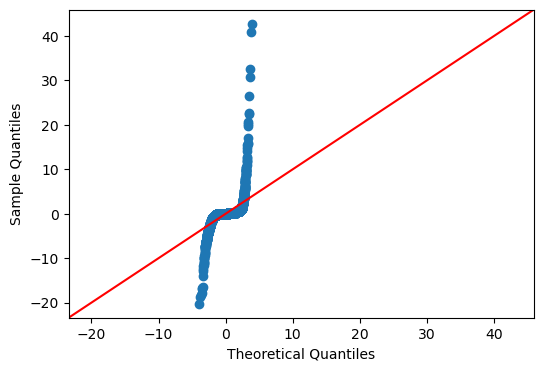

In [55]:
## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

### Residual Plot for Checking Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

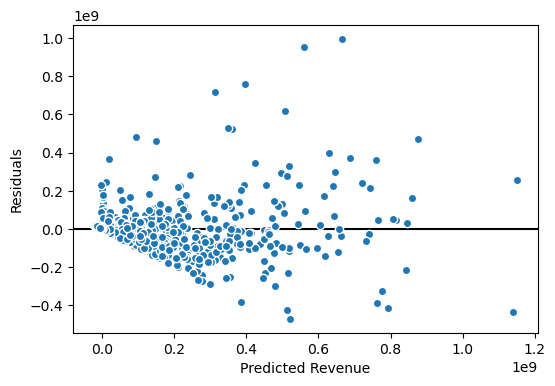

In [56]:
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

### Putting it all together

In [57]:
def evaluate_ols(result,X_train_df, y_train, show_summary=True):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    try:
        display(result.summary())
    except:
        pass
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     6156.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:48:13   Log-Likelihood:            -1.3614e+06
No. Observations:               73852   AIC:                         2.723e+06
Df Residuals:                   73816   BIC:                         2.723e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult                  2.887e+05   2.02e+06      0.143      0.887   -3.68e+06    4.25e+06
budget                    1.5375      0.011    141.377      0.000       1.516       1.559
popularity            -2659.7441   1.37e+04     -0.195      0.846   -2.95e+04    2.41e+04
runtime               -4397.0247   2705.793     -1.625      0.104   -9700.368     906.319
vote_average          -3.133e+05   3.61e+04     -8.686      0.000   -3.84e+05   -2.43e+05
vote_count             2.675e+04    147.482    181.386      0.000    2.65e+04     2.7e+04
year                   2.692e+04   1.56e+04      1.727      0.084   -3631.404    5.75e+04
month                 -3.458e+04   2.57e+04     -1.347      0.178   -8.49e+04    1.57e+04
day                   -5807.9437   9940.446     -0.584      0.559   -2.53e+04    1.37e+04
certification_G       -4.105e+06    4.1e+06     -1.002      0.316   -1.21e+07    3.92e+06
certification_MISSING -3.462e+06   3.95e+06     -0.878      0.380   -1.12e+07    4.27e+06
certification_NC-17   -6.753e+06   4.33e+06     -1.558      0.119   -1.52e+07    1.74e+06
certification_NR      -4.347e+06   3.97e+06     -1.094      0.274   -1.21e+07    3.44e+06
certification_PG      -2.409e+06   3.98e+06     -0.605      0.545   -1.02e+07    5.39e+06
certification_PG-13   -1.141e+07   3.95e+06     -2.891      0.004   -1.91e+07   -3.67e+06
certification_R       -1.667e+07   3.92e+06     -4.251      0.000   -2.44e+07   -8.99e+06
belongs_to_collection  8.318e+06   4.04e+05     20.589      0.000    7.53e+06    9.11e+06
Genre_Comedy          -3.087e+05    2.2e+05     -1.405      0.160   -7.39e+05    1.22e+05
Genre_Music            7.977e+05   6.31e+05      1.264      0.206   -4.39e+05    2.03e+06
Genre_Romance          2.526e+05   2.77e+05      0.912      0.362   -2.91e+05    7.96e+05
Genre_Science Fiction -3.846e+06   4.66e+05     -8.259      0.000   -4.76e+06   -2.93e+06
Genre_Drama            -4.44e+05   2.04e+05     -2.175      0.030   -8.44e+05   -4.39e+04
Genre_Action          -7.339e+05   3.22e+05     -2.282      0.022   -1.36e+06   -1.04e+05
Genre_Crime           -2.132e+06   3.71e+05     -5.744      0.000   -2.86e+06    -1.4e+06
Genre_Adventure        2.416e+06   4.77e+05      5.068      0.000    1.48e+06    3.35e+06
Genre_Animation        1.986e+06    5.9e+05      3.367      0.001     8.3e+05    3.14e+06
Genre_Fantasy          5.394e+05   4.76e+05      1.134      0.257   -3.93e+05    1.47e+06
Genre_Thriller        -7.569e+05   2.83e+05     -2.676      0.007   -1.31e+06   -2.02e+05
Genre_Horror            7.05e+04      3e+05      0.235      0.814   -5.18e+05    6.59e+05
Genre_History         -2.809e+06   6.22e+05     -4.514      0.000   -4.03e+06   -1.59e+06
Genre_Family          -5.919e+05   4.55e+05     -1.301      0.193   -1.48e+06       3e+05
Genre_Mystery         -

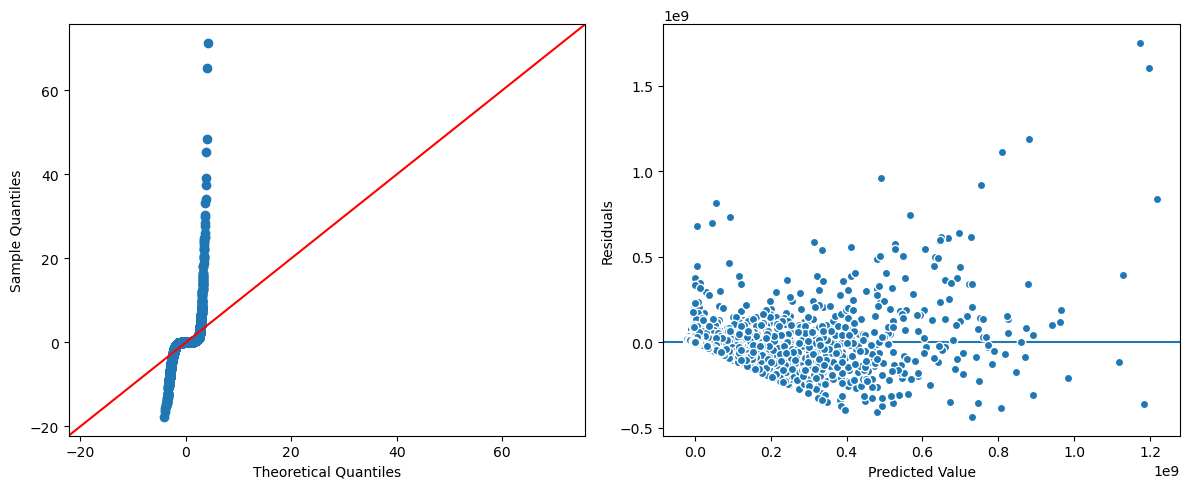

In [58]:
evaluate_ols(result,X_train_df, y_train)

# Improving Our Model:

> "Garbage In = Garbage Out"


- Before we dive into iterating on our model, I realized there were some big issues that I did not account for in the original data. 
    - some movies may not have been released. 
    - We should probably remove movies with 0 budget and revenue.
    

In [59]:
## reload the data
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df.head(2)

imdb_id  adult                     backdrop_path belongs_to_collection  \
0  tt0113026    0.0  /vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg                   NaN   
1  tt0113092    0.0                               NaN                   NaN   

       budget                                             genres homepage  \
0  10000000.0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...      NaN   
1         0.0           [{'id': 878, 'name': 'Science Fiction'}]      NaN   

         id original_language   original_title  \
0   62127.0                en  The Fantasticks   
1  110977.0                en    For the Cause   

                                            overview  popularity  \
0  Two rural teens sing and dance their way throu...       2.838   
1  Earth is in a state of constant war and two co...       2.410   

                        poster_path  \
0  /hfO64mXz3DgUxkBVU7no2UWRP7x.jpg   
1  /h9bWO13nWRGZJo4XVPiElXyrRMU.jpg   

                                production_companies  \
0  [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...   
1  [{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2000-09-22      0.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2000-11-15      0.0   

   runtime                                   spoken_languages    status  \
0     86.0  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
1    100.0  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   

                                         tagline            title  video  \
0  Try to remember the first time magic happened  The Fantasticks    0.0   
1   The ultimate showdown on a forbidden planet.    For the Cause    0.0   

   vote_average  vote_count certification  
0           5.5        22.0           NaN  
1           5.1         8.0           NaN

### Repeating Feature Engineering

In [60]:
## Columns to exclude - Keeping Status and companies
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', #'status','production_companies'
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)

## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()

## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

## Use our function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')

## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()

## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    


## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])


#### Fixing Certification
## Checking Certification values
df['certification'].value_counts(dropna=False)
# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)


#### Converting year to sep features
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)

## drop original feature
df = df.drop(columns=['release_date'])
df

imdb_id  adult  belongs_to_collection      budget  popularity  \
0      tt0113026    0.0                  False  10000000.0       2.838   
1      tt0113092    0.0                  False         0.0       2.410   
2      tt0116391    0.0                  False         0.0       0.655   
3      tt0116748    0.0                  False         0.0       0.600   
4      tt0118694    0.0                  False    150000.0      21.023   
...          ...    ...                    ...         ...         ...   
98465  tt9895024    0.0                  False         0.0       2.211   
98466  tt9896876    0.0                  False         0.0       7.577   
98467  tt9898844    0.0                  False         0.0      23.220   
98468  tt9900940    0.0                  False         0.0      23.406   
98469  tt9907782    0.0                  False         0.0      14.168   

                                    production_companies     revenue  runtime  \
0      [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...         0.0     86.0   
1      [{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...         0.0    100.0   
2                                                     []         0.0    152.0   
3                                                     []         0.0    180.0   
4      [{'id': 539, 'logo_path': None, 'name': 'Block...  12854953.0     99.0   
...                                                  ...         ...      ...   
98465  [{'id': 154995, 'logo_path': None, 'name': 'AS...         0.0    118.0   
98466  [{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...    283643.0    101.0   
98467  [{'id': 160303, 'logo_path': None, 'name': 'Mo...         0.0     91.0   
98468  [{'id': 91999, 'logo_path': None, 'name': 'Luc...         0.0     87.0   
98469  [{'id': 26065, 'logo_path': None, 'name': 'Pis...   4588389.0    111.0   

         status                    title  vote_average  vote_count  \
0      Released          The Fantasticks         5.500        22.0   
1      Released            For the Cause         5.100         8.0   
2      Released                     Gang         0.000         0.0   
3      Released                 Karobaar         5.500         2.0   
4      Released     In the Mood for Love         8.111      1979.0   
...         ...                      ...           ...         ...   
98465  Released            Heiko's World         6.400         4.0   
98466  Released  India Sweets and Spices         5.800        13.0   
98467  Released              The Hunting         5.569        65.0   
98468  Released             The Scrapper         5.250         3.0   
98469  Released               The Cursed         6.740       233.0   

      certification  Genre_Comedy  Genre_Music  Genre_Romance  \
0               NaN          True         True           True   
1               NaN         False        False          False   
2               NaN         False        False          False   
3               NaN         False        False           True   
4                PG         False        False           True   
...             ...           ...          ...            ...   
98465           NaN          True        False          False   
98466         PG-13          True        False           True   
98467           NaN         False        False          False   
98468           NaN         False        False          False   
98469           NaN         False        False          False   

       Genre_Science Fiction  Genre_Drama  Genre_Action  Genre_Crime  \
0                      False        False         False        False   
1                       True        False         False        False   
2                      False         True          True         True   
3                      False         True         False        False   
4                      False         True         False        False   
...                      ...          ...           ...          ...   
98465                

### Filtering

- Make sure to only keep:
    1. Status=Released.
    2. Budget >0
    3. Revenue >0

In [61]:
## Check status
df['status'].value_counts()

Released           98442
Post Production       19
In Production          5
Planned                3
Canceled               1
Name: status, dtype: int64

In [62]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

imdb_id  adult  belongs_to_collection      budget  popularity  \
0      tt0113026    0.0                  False  10000000.0       2.838   
1      tt0113092    0.0                  False         0.0       2.410   
2      tt0116391    0.0                  False         0.0       0.655   
3      tt0116748    0.0                  False         0.0       0.600   
4      tt0118694    0.0                  False    150000.0      21.023   
...          ...    ...                    ...         ...         ...   
98465  tt9895024    0.0                  False         0.0       2.211   
98466  tt9896876    0.0                  False         0.0       7.577   
98467  tt9898844    0.0                  False         0.0      23.220   
98468  tt9900940    0.0                  False         0.0      23.406   
98469  tt9907782    0.0                  False         0.0      14.168   

                                    production_companies     revenue  runtime  \
0      [{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...         0.0     86.0   
1      [{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...         0.0    100.0   
2                                                     []         0.0    152.0   
3                                                     []         0.0    180.0   
4      [{'id': 539, 'logo_path': None, 'name': 'Block...  12854953.0     99.0   
...                                                  ...         ...      ...   
98465  [{'id': 154995, 'logo_path': None, 'name': 'AS...         0.0    118.0   
98466  [{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...    283643.0    101.0   
98467  [{'id': 160303, 'logo_path': None, 'name': 'Mo...         0.0     91.0   
98468  [{'id': 91999, 'logo_path': None, 'name': 'Luc...         0.0     87.0   
98469  [{'id': 26065, 'logo_path': None, 'name': 'Pis...   4588389.0    111.0   

                         title  vote_average  vote_count certification  \
0              The Fantasticks         5.500        22.0           NaN   
1                For the Cause         5.100         8.0           NaN   
2                         Gang         0.000         0.0           NaN   
3                     Karobaar         5.500         2.0           NaN   
4         In the Mood for Love         8.111      1979.0            PG   
...                        ...           ...         ...           ...   
98465            Heiko's World         6.400         4.0           NaN   
98466  India Sweets and Spices         5.800        13.0         PG-13   
98467              The Hunting         5.569        65.0           NaN   
98468             The Scrapper         5.250         3.0           NaN   
98469               The Cursed         6.740       233.0           NaN   

       Genre_Comedy  Genre_Music  Genre_Romance  Genre_Science Fiction  \
0              True         True           True                  False   
1             False        False          False                   True   
2             False        False          False                  False   
3             False        False           True                  False   
4             False        False           True                  False   
...             ...          ...            ...                    ...   
98465          True        False          False                  False   
98466          True        False           True                  False   
98467         False        False          False                  False   
98468         False        False          False                  False   
98469         False        False          False                  False   

       Genre_Drama  Genre_Action  Genre_Crime  Genre_Adventure  \
0            False         False        False            False   
1            False         False        False            False   
2             True          True         True            False   
3             True         False        False            False   
4             True         False       

In [63]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
4      tt0118694    0.0                  False     150000.0      21.023   
13     tt0120467    0.0                  False     120000.0       5.710   
16     tt0120630    0.0                   True   45000000.0      44.689   
19     tt0120753    0.0                  False    8000000.0      10.868   
20     tt0120755    0.0                   True  125000000.0      32.524   
...          ...    ...                    ...          ...         ...   
98416  tt9742794    0.0                  False   15000000.0      29.572   
98428  tt9777666    0.0                   True  200000000.0      91.571   
98430  tt9784798    0.0                  False   26000000.0      25.550   
98444  tt9844322    0.0                   True   17516235.0      11.644   
98445  tt9844522    0.0                   True   15000000.0      39.583   

                                    production_companies      revenue  \
4      [{'id': 539, 'logo_path': None, 'name': 'Block...   12854953.0   
13     [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...      14904.0   
16     [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...  224834564.0   
19     [{'id': 1490, 'logo_path': None, 'name': 'Kint...     105983.0   
20     [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...  546388105.0   
...                                                  ...          ...   
98416  [{'id': 122844, 'logo_path': None, 'name': 'Ci...    8804000.0   
98428  [{'id': 82819, 'logo_path': '/gXfFl9pRPaoaq14j...   14400000.0   
98430  [{'id': 79426, 'logo_path': '/8aEC7xem9YwHNCDo...    6416063.0   
98444  [{'id': 2902, 'logo_path': '/vFmmYSgFp8eE6C34J...   19002036.0   
98445  [{'id': 333, 'logo_path': '/5xUJfzPZ8jWJUDzYtI...   65800000.0   

       runtime                                 title  vote_average  \
4         99.0                  In the Mood for Love         8.111   
13        87.0                                Vulgar         5.400   
16        84.0                           Chicken Run         6.727   
19       122.0              The Million Dollar Hotel         5.915   
20       123.0                Mission: Impossible II         6.107   
...        ...                                   ...           ...   
98416    114.0                             The Vault         6.842   
98428    138.0                      The Tomorrow War         7.563   
98430    126.0           Judas and the Black Messiah         7.350   
98444    120.0          Kaamelott: The First Chapter         6.622   
98445     88.0  Escape Room: Tournament of Champions         6.569   

       vote_count certification  Genre_Comedy  Genre_Music  Genre_Romance  \
4          1979.0            PG         False        False           True   
13           42.0             R         False        False          False   
16         4121.0             G          True        False          False   
19          254.0             R         False        False          False   
20         5471.0         PG-13         False        False          False   
...           ...           ...           ...          ...            ...   
98416       848.0             R         False        False          False   
98428      3054.0         PG-13         False        False          False   
98430      1402.0           NaN         False        False          False   
98444       649.0           NaN          True        False          False   
98445      1839.0         PG-13         False        False          False   

       Genre_Science Fiction  Genre_Drama  Genre_Action  Genre_Crime  \
4                      False         True         False        False   
13                     False         True         False         True   
16                     False        False         False        False   
19                     False         True         False        False   
20                     False        False          True        False   
...                      ...     

### Production Company

In [64]:
df['production_companies']

4        [{'id': 539, 'logo_path': None, 'name': 'Block...
13       [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...
16       [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...
19       [{'id': 1490, 'logo_path': None, 'name': 'Kint...
20       [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...
                               ...                        
98416    [{'id': 122844, 'logo_path': None, 'name': 'Ci...
98428    [{'id': 82819, 'logo_path': '/gXfFl9pRPaoaq14j...
98430    [{'id': 79426, 'logo_path': '/8aEC7xem9YwHNCDo...
98444    [{'id': 2902, 'logo_path': '/vFmmYSgFp8eE6C34J...
98445    [{'id': 333, 'logo_path': '/5xUJfzPZ8jWJUDzYtI...
Name: production_companies, Length: 6287, dtype: object

In [65]:
## Test case
test = df.iloc[-1]['production_companies']
test

"[{'id': 333, 'logo_path': '/5xUJfzPZ8jWJUDzYtIeuPO4qPIa.png', 'name': 'Original Film', 'origin_country': 'US'}, {'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLuyJFB9A.png', 'name': 'Columbia Pictures', 'origin_country': 'US'}, {'id': 41032, 'logo_path': '/op8wxWMnyzuh3Aq3lsZnaQv9C5.png', 'name': 'Shaken, Not Stirred Productions', 'origin_country': 'US'}]"

In [66]:
## getting longest string to check for multiple companies
idxmax = df['production_companies'].apply(len).idxmax()
idxmax

39497

In [67]:
test = df.loc[idxmax, 'production_companies']

In [68]:
# using regular expressions to extrap just the name
import re
exp= r"\'name\'\:.?\'(\w*.*?)\'"
re.findall(exp, test)
# df['production_companies'].str.extractall(exp,expand=False)

['Les Armateurs',
 'Maybe Movies',
 'StudioCanal',
 'France 3 Cinéma',
 'La Parti Production',
 'Melusine Productions',
 'RTBF',
 'Canal+',
 'Ciné+',
 'France Télévisions',
 'Eurimages',
 'MEDIA Programme of the European Union',
 'CNC',
 'La Région Île-de-France',
 'Pôle Image Magelis',
 'Département de la Charente',
 'Région Poitou-Charentes',
 'PROCIREP',
 'Angoa-Agicoa',
 'VOO',
 'Région Wallonne',
 'Tax Shelter du Gouvernement Fédéral Belge',
 'Casa Kafka Pictures',
 'Dexia',
 'Film Fund Luxembourg']

In [69]:
# Function to get out just the production company names
def get_prod_company_names(x):
    if x=='[]':
        return ["MISSING"]
    
    exp= r"\'name\'\:.?\'(\w*.*?)\'"
    companies = re.findall(exp, x)
    return companies
#     return ','.join(companies)


In [70]:
# df[df['prod_company'] =='']
get_prod_company_names(test)

['Les Armateurs',
 'Maybe Movies',
 'StudioCanal',
 'France 3 Cinéma',
 'La Parti Production',
 'Melusine Productions',
 'RTBF',
 'Canal+',
 'Ciné+',
 'France Télévisions',
 'Eurimages',
 'MEDIA Programme of the European Union',
 'CNC',
 'La Région Île-de-France',
 'Pôle Image Magelis',
 'Département de la Charente',
 'Région Poitou-Charentes',
 'PROCIREP',
 'Angoa-Agicoa',
 'VOO',
 'Région Wallonne',
 'Tax Shelter du Gouvernement Fédéral Belge',
 'Casa Kafka Pictures',
 'Dexia',
 'Film Fund Luxembourg']

In [71]:
## Save new clean prod_comapny col and explode
df['prod_company'] = df['production_companies'].apply(get_prod_company_names)
prod_companies = df['prod_company'].explode()#.nunique()

In [72]:
prod_companies.value_counts().head(50)

Warner Bros. Pictures        300
Universal Pictures           298
MISSING                      268
Columbia Pictures            250
20th Century Fox             214
Paramount                    190
Canal+                       166
New Line Cinema              151
Lionsgate                    149
Walt Disney Pictures         141
Relativity Media             126
StudioCanal                  114
Summit Entertainment         107
DreamWorks Pictures           99
Metro-Goldwyn-Mayer           98
Village Roadshow Pictures     92
Focus Features                88
Miramax                       82
Touchstone Pictures           80
Screen Gems                   72
Fox Searchlight Pictures      71
Dune Entertainment            67
Film4 Productions             64
Working Title Films           64
Regency Enterprises           61
Blumhouse Productions         60
Dimension Films               59
Millennium Media              59
TSG Entertainment             59
TF1 Films Production          59
BBC Film  

- Common Prod Company Encoding:
    - Keep top 50 most common companies an one hot encode

In [73]:
common_companies = sorted(prod_companies.value_counts().head(50).index)
common_companies

['20th Century Fox',
 'ARTE France Cinéma',
 'BBC Film',
 'Blumhouse Productions',
 'Canal+',
 'Ciné+',
 'Columbia Pictures',
 'Dimension Films',
 'DreamWorks Pictures',
 'Dune Entertainment',
 'EuropaCorp',
 'Film i Väst',
 'Film4 Productions',
 'FilmNation Entertainment',
 'Focus Features',
 'Fox 2000 Pictures',
 'Fox Searchlight Pictures',
 'France 2 Cinéma',
 'France 3 Cinéma',
 'Ingenious Media',
 'Legendary Pictures',
 'Lionsgate',
 'MISSING',
 'Mandate International',
 'Metro-Goldwyn-Mayer',
 'Millennium Media',
 'Miramax',
 'New Line Cinema',
 'New Regency Pictures',
 'Original Film',
 'Paramount',
 'Pathé',
 'Regency Enterprises',
 'Relativity Media',
 'Reliance Entertainment',
 'Scott Rudin Productions',
 'Screen Gems',
 'Spyglass Entertainment',
 'StudioCanal',
 'Summit Entertainment',
 'TF1 Films Production',
 'TSG Entertainment',
 'The Weinstein Company',
 'Touchstone Pictures',
 'Universal Pictures',
 'Village Roadshow Pictures',
 'Walt Disney Pictures',
 'Warner Bros. Pi

In [74]:
len(common_companies)

50

In [75]:
## manually ohe top 50 companies
for company in common_companies:
    df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)


In [76]:
df.head()

imdb_id  adult  belongs_to_collection       budget  popularity  \
4   tt0118694    0.0                  False     150000.0      21.023   
13  tt0120467    0.0                  False     120000.0       5.710   
16  tt0120630    0.0                   True   45000000.0      44.689   
19  tt0120753    0.0                  False    8000000.0      10.868   
20  tt0120755    0.0                   True  125000000.0      32.524   

                                 production_companies      revenue  runtime  \
4   [{'id': 539, 'logo_path': None, 'name': 'Block...   12854953.0     99.0   
13  [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...      14904.0     87.0   
16  [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...  224834564.0     84.0   
19  [{'id': 1490, 'logo_path': None, 'name': 'Kint...     105983.0    122.0   
20  [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...  546388105.0    123.0   

                       title  vote_average  vote_count certification  \
4       In the Mood for Love         8.111      1979.0            PG   
13                    Vulgar         5.400        42.0             R   
16               Chicken Run         6.727      4121.0             G   
19  The Million Dollar Hotel         5.915       254.0             R   
20    Mission: Impossible II         6.107      5471.0         PG-13   

    Genre_Comedy  Genre_Music  Genre_Romance  Genre_Science Fiction  \
4          False        False           True                  False   
13         False        False          False                  False   
16          True        False          False                  False   
19         False        False          False                  False   
20         False        False          False                  False   

    Genre_Drama  Genre_Action  Genre_Crime  Genre_Adventure  Genre_Animation  \
4          True         False        False            False            False   
13         True         False         True            False            False   
16        False         False        False            False             True   
19         True         False        False            False            False   
20        False          True        False             True            False   

    Genre_Fantasy  Genre_Thriller  Genre_Horror  Genre_History  Genre_Family  \
4           False           False         False          False         False   
13          False            True          True          False         False   
16          False           False         False          False          True   
19          False            True         False          False         False   
20          False            True         False          False         False   

    Genre_Mystery  Genre_Western  Genre_War  Genre_TV Movie  \
4           False          False      False           False   
13          False          False      False           False   
16          False          False      False           False   
19          False          False      False           False   
20          False          False      False           False   

    Genre_Documentary    year  month   day  \
4               False  2000.0    9.0  29.0   
13              False  2002.0    4.0  26.0   
16              False  2000.0    6.0  21.0   
19              False  2000.0    2.0   9.0   
20              False  2000.0    5.0  24.0   

                                         prod_company  \
4   [Block 2 Pictures, Jet Tone Films, Orly Films,...   
13  [View Askew Productions, Chango Productions, S...   
16  [DreamWorks Pictures, Aardman Animations, Drea...   
19                                  [Kintop Pictures]   
20             [Paramount, Cruise/Wagner Productions]   

    ProdComp_20th Century Fox  ProdComp_ARTE France Cinéma  ProdComp_BBC Film  \
4                       False                        False              False   
13                      False                        False              False   
16                      False     

In [77]:
drop_for_model = ['title','imdb_id','prod_company','production_companies']
df = df.drop(columns=drop_for_model)
df

adult  belongs_to_collection       budget  popularity      revenue  \
4        0.0                  False     150000.0      21.023   12854953.0   
13       0.0                  False     120000.0       5.710      14904.0   
16       0.0                   True   45000000.0      44.689  224834564.0   
19       0.0                  False    8000000.0      10.868     105983.0   
20       0.0                   True  125000000.0      32.524  546388105.0   
...      ...                    ...          ...         ...          ...   
98416    0.0                  False   15000000.0      29.572    8804000.0   
98428    0.0                   True  200000000.0      91.571   14400000.0   
98430    0.0                  False   26000000.0      25.550    6416063.0   
98444    0.0                   True   17516235.0      11.644   19002036.0   
98445    0.0                   True   15000000.0      39.583   65800000.0   

       runtime  vote_average  vote_count certification  Genre_Comedy  \
4         99.0         8.111      1979.0            PG         False   
13        87.0         5.400        42.0             R         False   
16        84.0         6.727      4121.0             G          True   
19       122.0         5.915       254.0             R         False   
20       123.0         6.107      5471.0         PG-13         False   
...        ...           ...         ...           ...           ...   
98416    114.0         6.842       848.0             R         False   
98428    138.0         7.563      3054.0         PG-13         False   
98430    126.0         7.350      1402.0           NaN         False   
98444    120.0         6.622       649.0           NaN          True   
98445     88.0         6.569      1839.0         PG-13         False   

       Genre_Music  Genre_Romance  Genre_Science Fiction  Genre_Drama  \
4            False           True                  False         True   
13           False          False                  False         True   
16           False          False                  False        False   
19           False          False                  False         True   
20           False          False                  False        False   
...            ...            ...                    ...          ...   
98416        False          False                  False         True   
98428        False          False                   True        False   
98430        False          False                  False         True   
98444        False          False                  False        False   
98445        False          False                  False        False   

       Genre_Action  Genre_Crime  Genre_Adventure  Genre_Animation  \
4             False        False            False            False   
13            False         True            False            False   
16            False        False            False             True   
19            False        False            False            False   
20             True        False             True            False   
...             ...          ...              ...              ...   
98416          True        False            False            False   
98428          True        False             True            False   
98430         False        False            False            False   
98444         False        False             True            False   
98445         False        False            False            False   

       Genre_Fantasy  Genre_Thriller  Genre_Horror  Genre_History  \
4              False           False         False          False   
13             False            True          True          False   
16             False           False         False          False   
19             False            True         False          False   
20             False            True         False          False   
...              ...             ...           ...            ...   
98416          F

# Checking for Linearity

In [78]:
## concatenating training data into plot_df
plot_df = pd.concat([X_train_df,y_train],axis=1)
plot_df

adult      budget  popularity  runtime  vote_average  vote_count  \
26715    0.0  24000000.0      15.456     94.0         5.980      2084.0   
69980    0.0         0.0       7.449    102.0         5.492        65.0   
78699    0.0         0.0       2.517    107.0         2.000         2.0   
73577    0.0         0.0       2.754     85.0         8.400         4.0   
28555    0.0         0.0       3.407    118.0         7.083        24.0   
...      ...         ...         ...      ...           ...         ...   
5929     0.0         0.0       0.991      0.0         6.000         1.0   
43807    0.0   5000000.0      11.632     97.0         6.866      1606.0   
4220     0.0         0.0       0.600      0.0         0.000         0.0   
6682     0.0         0.0       0.600     90.0         5.000         2.0   
97268    0.0         0.0       2.575     60.0         4.000         2.0   

         year  month   day  certification_G  certification_MISSING  \
26715  2009.0   10.0  17.0              0.0                    0.0   
69980  2018.0    4.0  25.0              0.0                    1.0   
78699  2018.0    4.0  21.0              0.0                    1.0   
73577  2017.0    5.0   2.0              0.0                    1.0   
28555  2010.0    2.0  20.0              0.0                    1.0   
...       ...    ...   ...              ...                    ...   
5929   2002.0    1.0   1.0              0.0                    1.0   
43807  2013.0    9.0  23.0              0.0                    0.0   
4220   2001.0    1.0   1.0              0.0                    1.0   
6682   2002.0    1.0   1.0              0.0                    1.0   
97268  2021.0   12.0   3.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
26715                  0.0               0.0               0.0   
69980                  0.0               0.0               0.0   
78699                  0.0               0.0               0.0   
73577                  0.0               0.0               0.0   
28555                  0.0               0.0               0.0   
...                    ...               ...               ...   
5929                   0.0               0.0               0.0   
43807                  0.0               0.0               0.0   
4220                   0.0               0.0               0.0   
6682                   0.0               0.0               0.0   
97268                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
26715                  0.0              1.0                    0.0   
69980                  0.0              0.0                    0.0   
78699                  0.0              0.0                    0.0   
73577                  0.0              0.0                    0.0   
28555                  0.0              0.0                    0.0   
...                    ...              ...                    ...   
5929                   0.0              0.0                    0.0   
43807                  0.0              1.0                    0.0   
4220                   0.0              0.0                    0.0   
6682                   0.0              0.0                    0.0   
97268                  0.0              0.0                    0.0   

       Genre_Comedy  Genre_Music  Genre_Romance  Genre_Science Fiction  \
26715           1.0          0.0            0.0                    0.0   
69980           0.0          0.0            0.0                    0.0   
78699           1.0          0.0            1.0                    0.0   
73577           0.0          0.0            0.0                    0.0   
28555           0.0          0.0            0.0                    0.0   
...             ...          ...            ...                    ...   
5929            0.0          0.0            0.0                    0.0   
43807           1.0          0.0       

In [79]:
## looking at columns for model to evaluate linearity
## save plot_cols to a list to show 
## (dropping genre columns from plot_df for pair_plot)
genre_cols = [c for c in df.columns if c.startswith('Genre')]
plot_cols = plot_df.drop(columns=['revenue',*genre_cols]).columns
len(plot_cols)

18

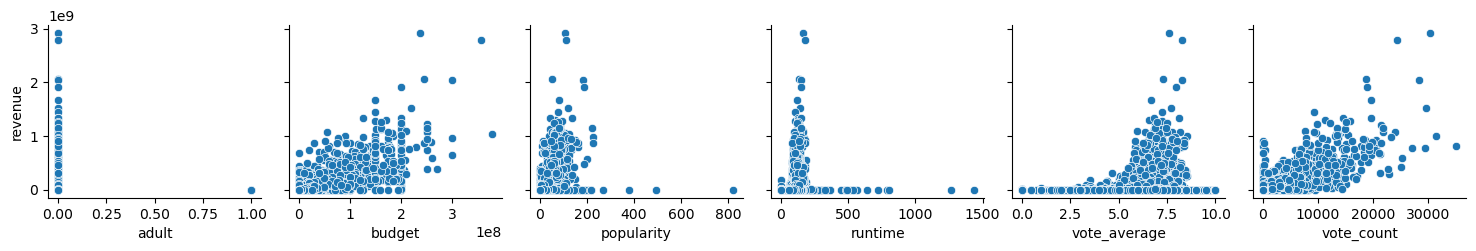

In [80]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[:6])

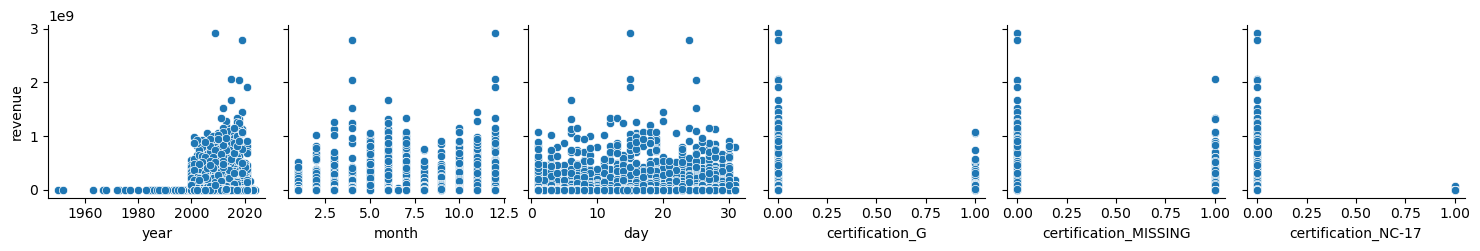

In [81]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[6:12])

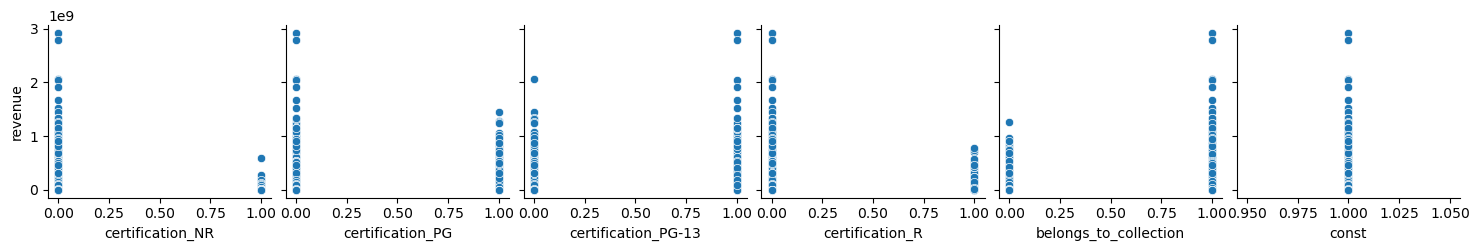

In [82]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[12:])

- Shouldn't have years before 2000, so drop. 
- Check outliers in popularity, runtime


In [83]:
# remove movies prior to 2000
df = df.loc[ df['year']>=2000]
df

adult  belongs_to_collection       budget  popularity      revenue  \
4        0.0                  False     150000.0      21.023   12854953.0   
13       0.0                  False     120000.0       5.710      14904.0   
16       0.0                   True   45000000.0      44.689  224834564.0   
19       0.0                  False    8000000.0      10.868     105983.0   
20       0.0                   True  125000000.0      32.524  546388105.0   
...      ...                    ...          ...         ...          ...   
98416    0.0                  False   15000000.0      29.572    8804000.0   
98428    0.0                   True  200000000.0      91.571   14400000.0   
98430    0.0                  False   26000000.0      25.550    6416063.0   
98444    0.0                   True   17516235.0      11.644   19002036.0   
98445    0.0                   True   15000000.0      39.583   65800000.0   

       runtime  vote_average  vote_count certification  Genre_Comedy  \
4         99.0         8.111      1979.0            PG         False   
13        87.0         5.400        42.0             R         False   
16        84.0         6.727      4121.0             G          True   
19       122.0         5.915       254.0             R         False   
20       123.0         6.107      5471.0         PG-13         False   
...        ...           ...         ...           ...           ...   
98416    114.0         6.842       848.0             R         False   
98428    138.0         7.563      3054.0         PG-13         False   
98430    126.0         7.350      1402.0           NaN         False   
98444    120.0         6.622       649.0           NaN          True   
98445     88.0         6.569      1839.0         PG-13         False   

       Genre_Music  Genre_Romance  Genre_Science Fiction  Genre_Drama  \
4            False           True                  False         True   
13           False          False                  False         True   
16           False          False                  False        False   
19           False          False                  False         True   
20           False          False                  False        False   
...            ...            ...                    ...          ...   
98416        False          False                  False         True   
98428        False          False                   True        False   
98430        False          False                  False         True   
98444        False          False                  False        False   
98445        False          False                  False        False   

       Genre_Action  Genre_Crime  Genre_Adventure  Genre_Animation  \
4             False        False            False            False   
13            False         True            False            False   
16            False        False            False             True   
19            False        False            False            False   
20             True        False             True            False   
...             ...          ...              ...              ...   
98416          True        False            False            False   
98428          True        False             True            False   
98430         False        False            False            False   
98444         False        False             True            False   
98445         False        False            False            False   

       Genre_Fantasy  Genre_Thriller  Genre_Horror  Genre_History  \
4              False           False         False          False   
13             False            True          True          False   
16             False           False         False          False   
19             False            True         False          False   
20             False            True         False          False   
...              ...             ...           ...            ...   
98416          F

> Creating a function to perform train test split and turn train and test data into a dataframe.

In [84]:
def get_train_test_split(df_, y_col='revenue',drop_cols=[]):
    
    ## Make copy of input df
    df = df_.copy()
    
    ## filter columns in drop cols (if exist)
    final_drop_cols = []
    [df.drop(columns=c,inplace=True) for c in df.columns if c in drop_cols]
    
    
    ## Make x and y variables
    y = df[y_col].copy()
    X = df.drop(columns=[y_col]).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
    

    
    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)


    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)


    ## select manually OHE cols for later
    bool_select = make_column_selector(dtype_include='bool')
    already_ohe_cols = bool_select(X_train)

    ## convert manual ohe to int
    X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
    X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse=False))
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                            )

    preprocessor = make_column_transformer((num_pipe, num_cols),
                                           (cat_pipe,cat_cols),remainder='passthrough')
    
    

    ## fit the col transformer
    preprocessor.fit(X_train)

    ## Finding the categorical pipeline in our col transformer.
    preprocessor.named_transformers_['pipeline-2']

    ## B) Using list-slicing to find the encoder 
    cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


    ## Create the empty list
    final_features = [*cat_features,*num_cols,*already_ohe_cols]

    ## Make df verisons of x data
    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                              columns=final_features, index=X_train.index)


    X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                             columns=final_features, index=X_test.index)


    ### Adding a Constant for Statsmodels
    ## Make final X_train_df and X_test_df with constants added
    X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
    X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
    return X_train_df, y_train, X_test_df, y_test


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     168.3
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:48:30   Log-Likelihood:                -92710.
No. Observations:                4702   AIC:                         1.856e+05
Df Residuals:                    4617   BIC:                         1.861e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     4.662e+07   9.33e+07      0.500      0.617   -1.36e+08    2.29e+08
certification_MISSING                  1.8826      0.053     35.268      0.000       1.778       1.987
certification_NC-17                 4.037e+05    1.1e+05      3.669      0.000    1.88e+05    6.19e+05
certification_NR                    1.739e+05   6.56e+04      2.649      0.008    4.52e+04    3.03e+05
certification_PG                   -4.448e+06   1.11e+06     -3.993      0.000   -6.63e+06   -2.26e+06
certification_PG-13                 2.589e+04    684.659     37.812      0.000    2.45e+04    2.72e+04
certification_R                     2.314e+05    2.5e+05      0.925      0.355   -2.59e+05    7.22e+05
adult                              -4.845e+04   3.85e+05     -0.126      0.900   -8.04e+05    7.07e+05
budget                              7.225e+04   1.54e+05      0.470      0.638   -2.29e+05    3.73e+05
popularity                         -6.516e+07   6.33e+07     -1.030      0.303   -1.89e+08    5.88e+07
runtime                            -5.201e+07   6.33e+07     -0.822      0.411   -1.76e+08    7.21e+07
vote_average                         -5.3e+07    6.7e+07     -0.790      0.429   -1.84e+08    7.84e+07
vote_count                         -5.871e+07   6.34e+07     -0.926      0.355   -1.83e+08    6.56e+07
year                               -5.449e+07    6.3e+07     -0.865      0.387   -1.78e+08     6.9e+07
month                              -6.046e+07    6.3e+07     -0.960      0.337   -1.84e+08     6.3e+07
day                                 -7.69e+07   6.29e+07     -1.223      0.221      -2e+08    4.64e+07
belongs_to_collection               4.318e+07   3.62e+06     11.942      0.000    3.61e+07    5.03e+07
Genre_Comedy                         1.63e+06   3.37e+06      0.484      0.628   -4.97e+06    8.23e+06
Genre_Music                         1.752e+07   8.15e+06      2.150      0.032    1.54e+06    3.35e+07
Genre_Romance                       7.412e+06   3.72e+06      1.995      0.046    1.27e+05    1.47e+07
Genre_Science Fiction               -3.03e+07   5.26e+06     -5.761      0.000   -4.06e+07      -2e+07
Genre_Drama                        -2.605e+06   3.35e+06     -0.777      0.437   -9.18e+06    3.97e+06
Genre_Action                       -9.234e+06   3.74e+06     -2.470      0.014   -1.66e+07    -1.9e+06
Genre_Crime                        -6.601e+06   4.17e+06     -1.584      0.113   -1.48e+07    1.57e+06
Genre_Adventure                     3.591e+06   4.48e+06      0.802      0.423   -5.19e+06    1.24e+07
Genre_Animation                     2.665e+07   7.02e+06      3.794      0.000    1.29e+07    4.04e+07
Genre_Fantasy                      -1.509e+07   4.88e+06     -3.093      0.002   -2.47e+07   -5.

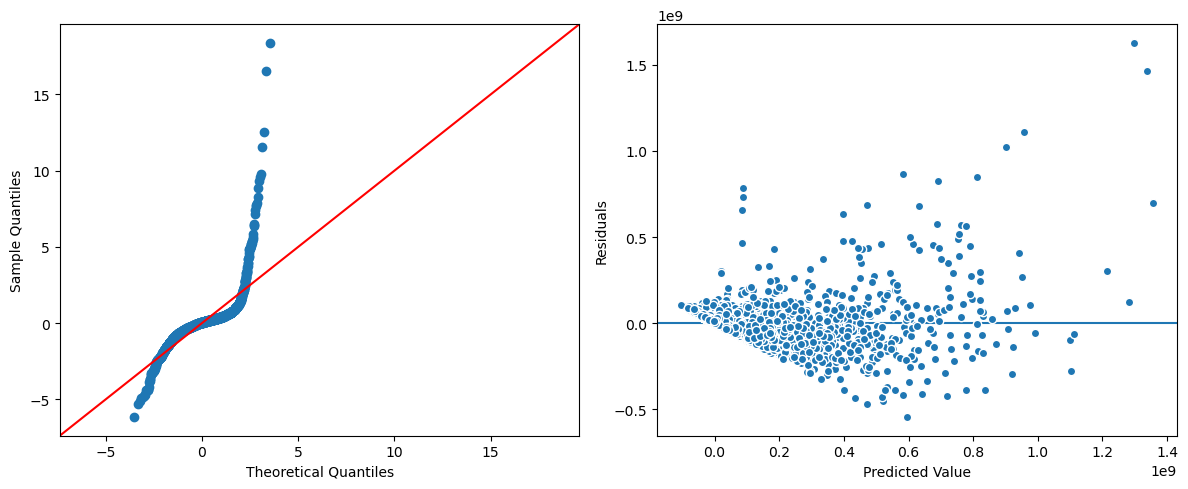

In [85]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

## Removing Outliers

In [86]:
from scipy import stats
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [87]:
## save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue']

outliers = {}
for col in outlier_cols:
    outliers_col = find_outliers(df[col])
    outliers[col] = outliers_col

- 89 outliers found in runtime using Z-Scores.
- 141 outliers found in popularity using Z-Scores.
- 156 outliers found in revenue using Z-Scores.


In [88]:
# Make new df_clean copy of df
df_clean = df.copy()

## loop through dictionary to remove outliers
for col, idx_outliers in outliers.items():
    df_clean = df_clean[~idx_outliers]
df_clean

adult  belongs_to_collection       budget  popularity      revenue  \
4        0.0                  False     150000.0      21.023   12854953.0   
13       0.0                  False     120000.0       5.710      14904.0   
16       0.0                   True   45000000.0      44.689  224834564.0   
19       0.0                  False    8000000.0      10.868     105983.0   
20       0.0                   True  125000000.0      32.524  546388105.0   
...      ...                    ...          ...         ...          ...   
98388    0.0                  False   20000000.0      29.784    4298184.0   
98416    0.0                  False   15000000.0      29.572    8804000.0   
98430    0.0                  False   26000000.0      25.550    6416063.0   
98444    0.0                   True   17516235.0      11.644   19002036.0   
98445    0.0                   True   15000000.0      39.583   65800000.0   

       runtime  vote_average  vote_count certification  Genre_Comedy  \
4         99.0         8.111      1979.0            PG         False   
13        87.0         5.400        42.0             R         False   
16        84.0         6.727      4121.0             G          True   
19       122.0         5.915       254.0             R         False   
20       123.0         6.107      5471.0         PG-13         False   
...        ...           ...         ...           ...           ...   
98388    108.0         5.965       750.0         PG-13         False   
98416    114.0         6.842       848.0             R         False   
98430    126.0         7.350      1402.0           NaN         False   
98444    120.0         6.622       649.0           NaN          True   
98445     88.0         6.569      1839.0         PG-13         False   

       Genre_Music  Genre_Romance  Genre_Science Fiction  Genre_Drama  \
4            False           True                  False         True   
13           False          False                  False         True   
16           False          False                  False        False   
19           False          False                  False         True   
20           False          False                  False        False   
...            ...            ...                    ...          ...   
98388        False          False                   True        False   
98416        False          False                  False         True   
98430        False          False                  False         True   
98444        False          False                  False        False   
98445        False          False                  False        False   

       Genre_Action  Genre_Crime  Genre_Adventure  Genre_Animation  \
4             False        False            False            False   
13            False         True            False            False   
16            False        False            False             True   
19            False        False            False            False   
20             True        False             True            False   
...             ...          ...              ...              ...   
98388         False        False            False            False   
98416          True        False            False            False   
98430         False        False            False            False   
98444         False        False             True            False   
98445         False        False            False            False   

       Genre_Fantasy  Genre_Thriller  Genre_Horror  Genre_History  \
4              False           False         False          False   
13             False            True          True          False   
16             False           False         False          False   
19             False            True         False          False   
20             False            True         False          False   
...              ...             ...           ...            ...   
98388          F

### Model 3: Outliers Removed (Z_scores)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     156.4
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:48:33   Log-Likelihood:                -85003.
No. Observations:                4464   AIC:                         1.702e+05
Df Residuals:                    4379   BIC:                         1.707e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     3.134e+06   4.55e+07      0.069      0.945   -8.62e+07    9.24e+07
certification_MISSING                  1.1716      0.033     35.940      0.000       1.108       1.235
certification_NC-17                 2.906e+05   8.57e+04      3.390      0.001    1.23e+05    4.59e+05
certification_NR                    1.645e+05   4.01e+04      4.098      0.000    8.58e+04    2.43e+05
certification_PG                   -6.997e+05   6.04e+05     -1.159      0.247   -1.88e+06    4.84e+05
certification_PG-13                 1.686e+04    443.471     38.008      0.000     1.6e+04    1.77e+04
certification_R                    -5.153e+05   1.33e+05     -3.874      0.000   -7.76e+05   -2.55e+05
adult                              -1.484e+05      2e+05     -0.742      0.458    -5.4e+05    2.44e+05
budget                             -4.461e+04   7.99e+04     -0.559      0.576   -2.01e+05    1.12e+05
popularity                          1.432e+08   3.37e+07      4.251      0.000    7.72e+07    2.09e+08
runtime                              1.25e+08   3.37e+07      3.715      0.000     5.9e+07    1.91e+08
vote_average                          1.3e+08   3.53e+07      3.682      0.000    6.08e+07    1.99e+08
vote_count                          1.266e+08   3.36e+07      3.765      0.000    6.07e+07    1.93e+08
year                                1.282e+08   3.35e+07      3.824      0.000    6.25e+07    1.94e+08
month                                1.26e+08   3.34e+07      3.770      0.000    6.05e+07    1.91e+08
day                                 1.129e+08   3.34e+07      3.382      0.001    4.75e+07    1.78e+08
belongs_to_collection               2.735e+07    1.9e+06     14.360      0.000    2.36e+07    3.11e+07
Genre_Comedy                        5.437e+06   1.78e+06      3.057      0.002    1.95e+06    8.92e+06
Genre_Music                         8.296e+06   4.19e+06      1.980      0.048    8.26e+04    1.65e+07
Genre_Romance                       2.093e+06   1.96e+06      1.070      0.285   -1.74e+06    5.93e+06
Genre_Science Fiction              -2.266e+07   2.71e+06     -8.375      0.000    -2.8e+07   -1.74e+07
Genre_Drama                         -3.02e+06   1.74e+06     -1.737      0.083   -6.43e+06    3.89e+05
Genre_Action                       -8.563e+05   1.94e+06     -0.441      0.659   -4.66e+06    2.95e+06
Genre_Crime                        -4.985e+06   2.15e+06     -2.318      0.020    -9.2e+06    -7.7e+05
Genre_Adventure                    -1.043e+06   2.33e+06     -0.449      0.654    -5.6e+06    3.52e+06
Genre_Animation                     1.265e+07   3.78e+06      3.348      0.001    5.24e+06    2.01e+07
Genre_Fantasy                       -1.06e+07   2.69e+06     -3.943      0.000   -1.59e+07   -5.

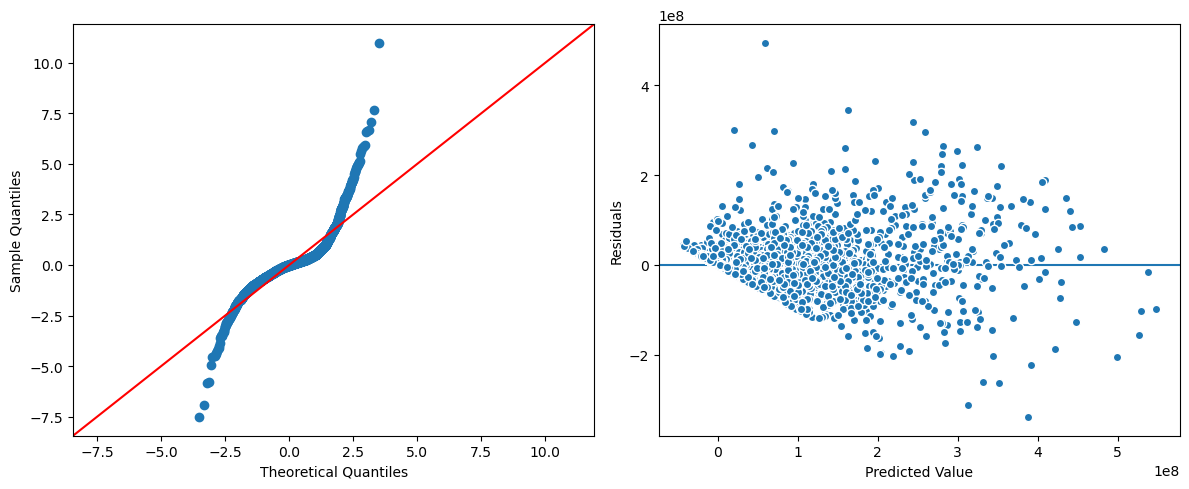

In [89]:
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

### Removing Outliers - Using IQR Rule

<Axes: xlabel='revenue'>

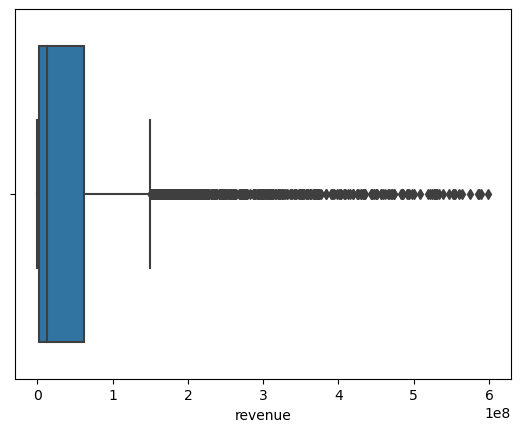

In [90]:
sns.boxplot(x = y_train)

In [91]:
def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
        
    return outliers

In [92]:
outliers_z = find_outliers(df['revenue'])
outliers_z

- 156 outliers found in revenue using Z-Scores.


4        False
13       False
16       False
19       False
20       False
         ...  
98416    False
98428    False
98430    False
98444    False
98445    False
Name: revenue, Length: 6270, dtype: bool

In [93]:
outliers_iqr = find_outliers_IQR(df['revenue'])
outliers_iqr

- 719 outliers found in revenue using IQR.


4        False
13       False
16        True
19       False
20        True
         ...  
98416    False
98428    False
98430    False
98444    False
98445    False
Name: revenue, Length: 6270, dtype: bool

In [94]:
## Loop to remove outliers from same columns using new function
outlier_cols = ['runtime','popularity','revenue']

## Empty dict for both types of outliers
outliers_z = {}
outliers_iqr = {}

## Use both functions to see the comparison for # of outliers
for col in outlier_cols:
    outliers_col_z = find_outliers(df[col])
    outliers_z[col] = outliers_col_z
    
    outliers_col_iqr = find_outliers_IQR(df[col])
    outliers_iqr[col] = outliers_col_iqr
    print()
    

- 89 outliers found in runtime using Z-Scores.
- 191 outliers found in runtime using IQR.

- 141 outliers found in popularity using Z-Scores.
- 403 outliers found in popularity using IQR.

- 156 outliers found in revenue using Z-Scores.
- 719 outliers found in revenue using IQR.



In [95]:
# remove_outliers using z-score
df_clean_z = df.copy()
for col, idx_outliers in outliers_z.items():
    df_clean_z = df_clean_z[~idx_outliers]
df_clean_z

adult  belongs_to_collection       budget  popularity      revenue  \
4        0.0                  False     150000.0      21.023   12854953.0   
13       0.0                  False     120000.0       5.710      14904.0   
16       0.0                   True   45000000.0      44.689  224834564.0   
19       0.0                  False    8000000.0      10.868     105983.0   
20       0.0                   True  125000000.0      32.524  546388105.0   
...      ...                    ...          ...         ...          ...   
98388    0.0                  False   20000000.0      29.784    4298184.0   
98416    0.0                  False   15000000.0      29.572    8804000.0   
98430    0.0                  False   26000000.0      25.550    6416063.0   
98444    0.0                   True   17516235.0      11.644   19002036.0   
98445    0.0                   True   15000000.0      39.583   65800000.0   

       runtime  vote_average  vote_count certification  Genre_Comedy  \
4         99.0         8.111      1979.0            PG         False   
13        87.0         5.400        42.0             R         False   
16        84.0         6.727      4121.0             G          True   
19       122.0         5.915       254.0             R         False   
20       123.0         6.107      5471.0         PG-13         False   
...        ...           ...         ...           ...           ...   
98388    108.0         5.965       750.0         PG-13         False   
98416    114.0         6.842       848.0             R         False   
98430    126.0         7.350      1402.0           NaN         False   
98444    120.0         6.622       649.0           NaN          True   
98445     88.0         6.569      1839.0         PG-13         False   

       Genre_Music  Genre_Romance  Genre_Science Fiction  Genre_Drama  \
4            False           True                  False         True   
13           False          False                  False         True   
16           False          False                  False        False   
19           False          False                  False         True   
20           False          False                  False        False   
...            ...            ...                    ...          ...   
98388        False          False                   True        False   
98416        False          False                  False         True   
98430        False          False                  False         True   
98444        False          False                  False        False   
98445        False          False                  False        False   

       Genre_Action  Genre_Crime  Genre_Adventure  Genre_Animation  \
4             False        False            False            False   
13            False         True            False            False   
16            False        False            False             True   
19            False        False            False            False   
20             True        False             True            False   
...             ...          ...              ...              ...   
98388         False        False            False            False   
98416          True        False            False            False   
98430         False        False            False            False   
98444         False        False             True            False   
98445         False        False            False            False   

       Genre_Fantasy  Genre_Thriller  Genre_Horror  Genre_History  \
4              False           False         False          False   
13             False            True          True          False   
16             False           False         False          False   
19             False            True         False          False   
20             False            True         False          False   
...              ...             ...           ...            ...   
98388          F

In [96]:
# remove_outliers using iqr
df_clean_iqr = df.copy()
for col, idx_outliers in outliers_iqr.items():
    df_clean_iqr = df_clean_iqr[~idx_outliers]
df_clean_iqr

adult  belongs_to_collection      budget  popularity     revenue  \
4        0.0                  False    150000.0      21.023  12854953.0   
13       0.0                  False    120000.0       5.710     14904.0   
19       0.0                  False   8000000.0      10.868    105983.0   
22       0.0                  False  75000000.0      15.616  36754634.0   
25       0.0                  False  24000000.0       8.466  36609995.0   
...      ...                    ...         ...         ...         ...   
98388    0.0                  False  20000000.0      29.784   4298184.0   
98416    0.0                  False  15000000.0      29.572   8804000.0   
98430    0.0                  False  26000000.0      25.550   6416063.0   
98444    0.0                   True  17516235.0      11.644  19002036.0   
98445    0.0                   True  15000000.0      39.583  65800000.0   

       runtime  vote_average  vote_count certification  Genre_Comedy  \
4         99.0         8.111      1979.0            PG         False   
13        87.0         5.400        42.0             R         False   
19       122.0         5.915       254.0             R         False   
22        94.0         6.601       885.0            PG         False   
25       115.0         6.683       330.0            PG          True   
...        ...           ...         ...           ...           ...   
98388    108.0         5.965       750.0         PG-13         False   
98416    114.0         6.842       848.0             R         False   
98430    126.0         7.350      1402.0           NaN         False   
98444    120.0         6.622       649.0           NaN          True   
98445     88.0         6.569      1839.0         PG-13         False   

       Genre_Music  Genre_Romance  Genre_Science Fiction  Genre_Drama  \
4            False           True                  False         True   
13           False          False                  False         True   
19           False          False                  False         True   
22           False          False                   True        False   
25           False           True                  False        False   
...            ...            ...                    ...          ...   
98388        False          False                   True        False   
98416        False          False                  False         True   
98430        False          False                  False         True   
98444        False          False                  False        False   
98445        False          False                  False        False   

       Genre_Action  Genre_Crime  Genre_Adventure  Genre_Animation  \
4             False        False            False            False   
13            False         True            False            False   
19            False        False            False            False   
22             True        False             True             True   
25            False        False            False            False   
...             ...          ...              ...              ...   
98388         False        False            False            False   
98416          True        False            False            False   
98430         False        False            False            False   
98444         False        False             True            False   
98445         False        False            False            False   

       Genre_Fantasy  Genre_Thriller  Genre_Horror  Genre_History  \
4              False           False         False          False   
13             False            True          True          False   
19             False            True         False          False   
22             False           False         False          False   
25             False           False         False          False   
...              ...             ...           ...            ...   
98388          False            True    

### Model 4 - IQR Outliers Removed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     81.02
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:48:38   Log-Likelihood:                -73045.
No. Observations:                3959   AIC:                         1.463e+05
Df Residuals:                    3874   BIC:                         1.468e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     2.552e+06   2.52e+07      0.101      0.919   -4.69e+07     5.2e+07
certification_MISSING                  0.6248      0.025     24.846      0.000       0.576       0.674
certification_NC-17                 6.799e+05   6.65e+04     10.228      0.000     5.5e+05     8.1e+05
certification_NR                    1.372e+05   2.51e+04      5.460      0.000     8.8e+04    1.86e+05
certification_PG                   -1.869e+05   3.59e+05     -0.520      0.603   -8.91e+05    5.18e+05
certification_PG-13                 9170.2077    386.445     23.730      0.000    8412.552    9927.863
certification_R                    -3.847e+05   7.98e+04     -4.823      0.000   -5.41e+05   -2.28e+05
adult                              -1.272e+05   1.17e+05     -1.083      0.279   -3.57e+05    1.03e+05
budget                             -2.924e+04    4.7e+04     -0.623      0.534   -1.21e+05    6.28e+04
popularity                          1.013e+08   2.02e+07      5.019      0.000    6.18e+07    1.41e+08
runtime                             9.364e+07   2.02e+07      4.637      0.000     5.4e+07    1.33e+08
vote_average                        9.444e+07   2.12e+07      4.453      0.000    5.29e+07    1.36e+08
vote_count                          9.225e+07   2.02e+07      4.577      0.000    5.27e+07    1.32e+08
year                                1.001e+08   2.01e+07      4.978      0.000    6.07e+07    1.39e+08
month                               9.696e+07   2.01e+07      4.834      0.000    5.76e+07    1.36e+08
day                                  8.63e+07      2e+07      4.312      0.000    4.71e+07    1.26e+08
belongs_to_collection               1.291e+07   1.16e+06     11.146      0.000    1.06e+07    1.52e+07
Genre_Comedy                        3.597e+06   1.04e+06      3.461      0.001    1.56e+06    5.63e+06
Genre_Music                         3.328e+06    2.4e+06      1.385      0.166   -1.38e+06    8.04e+06
Genre_Romance                       1.148e+06   1.13e+06      1.013      0.311   -1.07e+06    3.37e+06
Genre_Science Fiction              -1.326e+07   1.68e+06     -7.896      0.000   -1.65e+07   -9.97e+06
Genre_Drama                        -3.849e+06   1.02e+06     -3.788      0.000   -5.84e+06   -1.86e+06
Genre_Action                       -1.821e+06   1.14e+06     -1.592      0.112   -4.06e+06    4.22e+05
Genre_Crime                        -3.861e+05   1.25e+06     -0.309      0.757   -2.84e+06    2.06e+06
Genre_Adventure                    -3.129e+06    1.4e+06     -2.235      0.025   -5.87e+06   -3.84e+05
Genre_Animation                    -2.077e+05   2.41e+06     -0.086      0.931   -4.92e+06    4.51e+06
Genre_Fantasy                      -3.508e+06   1.67e+06     -2.098      0.036   -6.79e+06   -2.

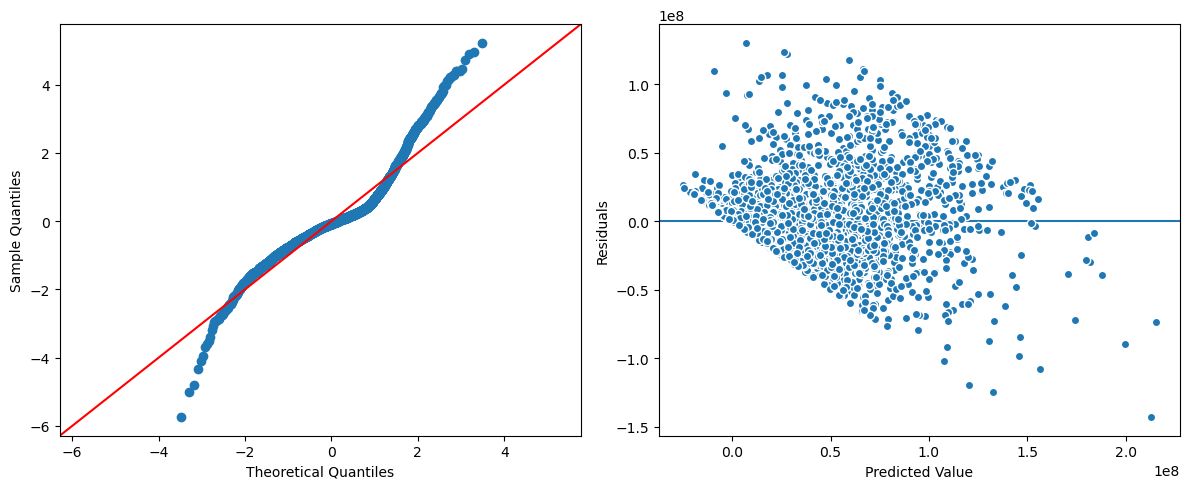

In [97]:
## MAKE NEW MODEL WITH IQR OUTLIERS REMOVED

X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean_iqr)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

> How are we doing?

In [98]:
## get pvalues from model result
pvals = result.pvalues 
pvals

certification_G                    9.194889e-01
certification_MISSING             1.437076e-126
certification_NC-17                3.025907e-24
certification_NR                   5.045986e-08
certification_PG                   6.029137e-01
                                      ...      
ProdComp_Walt Disney Pictures      6.263492e-04
ProdComp_Warner Bros. Pictures     5.932637e-02
ProdComp_Wild Bunch                3.542340e-01
ProdComp_Working Title Films       1.745979e-02
const                              2.178572e-06
Length: 87, dtype: float64

In [99]:
## Check for p-values that are >.05
pvals[ pvals>.05]

certification_G                       0.919489
certification_PG                      0.602914
adult                                 0.278798
budget                                0.533639
Genre_Music                           0.166177
Genre_Romance                         0.310996
Genre_Action                          0.111531
Genre_Crime                           0.757285
Genre_Animation                       0.931223
Genre_Thriller                        0.908124
Genre_Horror                          0.904554
Genre_History                         0.312686
Genre_Family                          0.760850
Genre_Mystery                         0.784838
Genre_War                             0.705164
Genre_TV Movie                        0.983807
Genre_Documentary                     0.490312
ProdComp_ARTE France Cinéma           0.519967
ProdComp_BBC Film                     0.060028
ProdComp_Canal+                       0.054501
ProdComp_Ciné+                        0.598114
ProdComp_Dime

## Removing features - based on p-values

In [100]:
## Get list of ALL genre columns to see how many are sig
genre_cols = [c for c in df_clean.columns if c.startswith("Genre")]
genre_cols

['Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Thriller',
 'Genre_Horror',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [101]:
## save just genre pvalues
genre_pvals = pvals[genre_cols] > 0.05
## calc what % are insig?
genre_pvals.value_counts(normalize = True)

True     0.684211
False    0.315789
dtype: float64

In [102]:
## Get list of ALL prod_comp columns to see how many are sig
comp_cols = [c for c in df_clean.columns if c.startswith("ProdComp")]
comp_cols

['ProdComp_20th Century Fox',
 'ProdComp_ARTE France Cinéma',
 'ProdComp_BBC Film',
 'ProdComp_Blumhouse Productions',
 'ProdComp_Canal+',
 'ProdComp_Ciné+',
 'ProdComp_Columbia Pictures',
 'ProdComp_Dimension Films',
 'ProdComp_DreamWorks Pictures',
 'ProdComp_Dune Entertainment',
 'ProdComp_EuropaCorp',
 'ProdComp_Film i Väst',
 'ProdComp_Film4 Productions',
 'ProdComp_FilmNation Entertainment',
 'ProdComp_Focus Features',
 'ProdComp_Fox 2000 Pictures',
 'ProdComp_Fox Searchlight Pictures',
 'ProdComp_France 2 Cinéma',
 'ProdComp_France 3 Cinéma',
 'ProdComp_Ingenious Media',
 'ProdComp_Legendary Pictures',
 'ProdComp_Lionsgate',
 'ProdComp_MISSING',
 'ProdComp_Mandate International',
 'ProdComp_Metro-Goldwyn-Mayer',
 'ProdComp_Millennium Media',
 'ProdComp_Miramax',
 'ProdComp_New Line Cinema',
 'ProdComp_New Regency Pictures',
 'ProdComp_Original Film',
 'ProdComp_Paramount',
 'ProdComp_Pathé',
 'ProdComp_Regency Enterprises',
 'ProdComp_Relativity Media',
 'ProdComp_Reliance Enter

In [103]:
## save just genre pvalues
comp_pvals = pvals[comp_cols] > 0.05
comp_pvals.value_counts(normalize = True)

True     0.64
False    0.36
dtype: float64

> both have >50% bad pvalues. You can drop both if you choose.

In [104]:
## what pvals are remaining?
other_pvals = pvals.drop([*comp_cols, *genre_cols])
other_pvals[other_pvals>.05]

certification_G     0.919489
certification_PG    0.602914
adult               0.278798
budget              0.533639
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     67.27
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:48:43   Log-Likelihood:                -73266.
No. Observations:                3959   AIC:                         1.467e+05
Df Residuals:                    3876   BIC:                         1.472e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     9.263e+05   6.77e+04     13.684      0.000    7.94e+05    1.06e+06
certification_MISSING               2.167e+05   2.62e+04      8.273      0.000    1.65e+05    2.68e+05
certification_NC-17                 -9.54e+05   3.64e+05     -2.622      0.009   -1.67e+06   -2.41e+05
certification_NR                    1.064e+04    414.172     25.686      0.000    9826.220    1.15e+04
certification_PG                   -6.599e+05    8.3e+04     -7.946      0.000   -8.23e+05   -4.97e+05
certification_PG-13                 2.311e+04   1.25e+05      0.185      0.853   -2.21e+05    2.67e+05
certification_R                     2.661e+04   4.95e+04      0.537      0.591   -7.05e+04    1.24e+05
popularity                          1.695e+08   2.11e+07      8.045      0.000    1.28e+08    2.11e+08
runtime                             1.606e+08    2.1e+07      7.632      0.000    1.19e+08    2.02e+08
vote_average                        1.598e+08    2.2e+07      7.277      0.000    1.17e+08    2.03e+08
vote_count                          1.588e+08    2.1e+07      7.551      0.000    1.18e+08       2e+08
year                                1.741e+08   2.09e+07      8.321      0.000    1.33e+08    2.15e+08
month                               1.684e+08   2.09e+07      8.058      0.000    1.27e+08    2.09e+08
day                                 1.541e+08   2.09e+07      7.386      0.000    1.13e+08    1.95e+08
belongs_to_collection               1.129e+07   1.24e+06      9.140      0.000    8.87e+06    1.37e+07
Genre_Comedy                        3.824e+06   1.08e+06      3.529      0.000     1.7e+06    5.95e+06
Genre_Music                         3.966e+06    2.6e+06      1.528      0.127   -1.12e+06    9.06e+06
Genre_Romance                       7.656e+05   1.19e+06      0.645      0.519   -1.56e+06    3.09e+06
Genre_Science Fiction              -8.214e+06   1.82e+06     -4.502      0.000   -1.18e+07   -4.64e+06
Genre_Drama                         -4.31e+06   1.07e+06     -4.043      0.000    -6.4e+06   -2.22e+06
Genre_Action                        1.696e+06   1.21e+06      1.399      0.162   -6.82e+05    4.07e+06
Genre_Crime                         1.125e+06   1.33e+06      0.843      0.399   -1.49e+06    3.74e+06
Genre_Adventure                      1.32e+05   1.47e+06      0.090      0.928   -2.75e+06    3.02e+06
Genre_Animation                     3.341e+06   2.47e+06      1.352      0.176    -1.5e+06    8.18e+06
Genre_Fantasy                       3.989e+05   1.75e+06      0.228      0.820   -3.03e+06    3.83e+06
Genre_Thriller                     -2.351e+05   1.19e+06     -0.197      0.844   -2.57e+06     2.1e+06
Genre_Horror                       -4.696e+05    1.6e+06     -0.293      0.769   -3.61e+06    2.

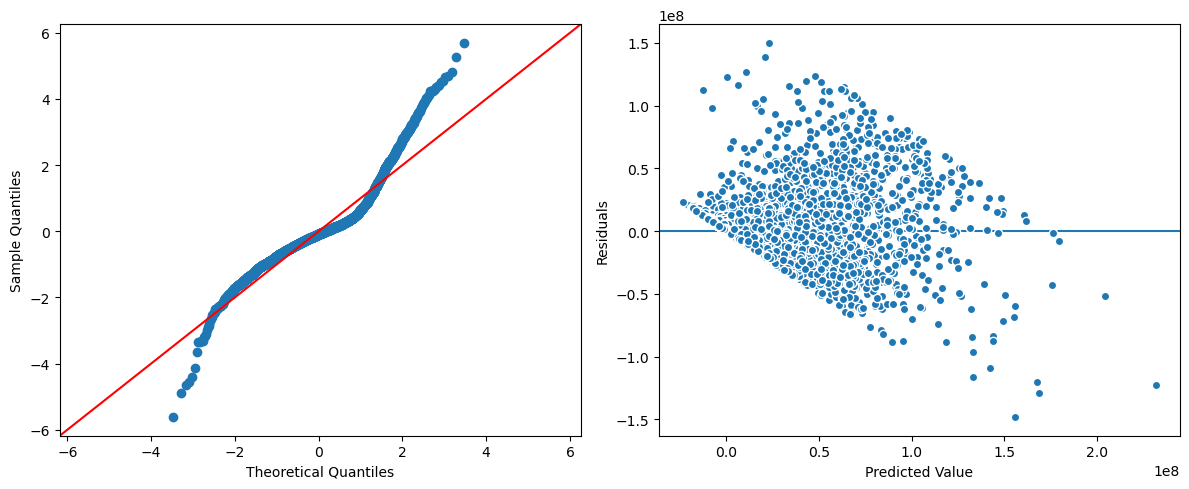

In [105]:
## Make x,y vars, but drop features with bad pvalues
df_clean_iqr = df_clean_iqr.drop(columns=['adult','budget'])
X_train_df, y_train, X_test_df, y_test = \
                                get_train_test_split(df_clean_iqr,)
## MAKE AND EVALUATE OLS
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

# Addressing Multicollinearity

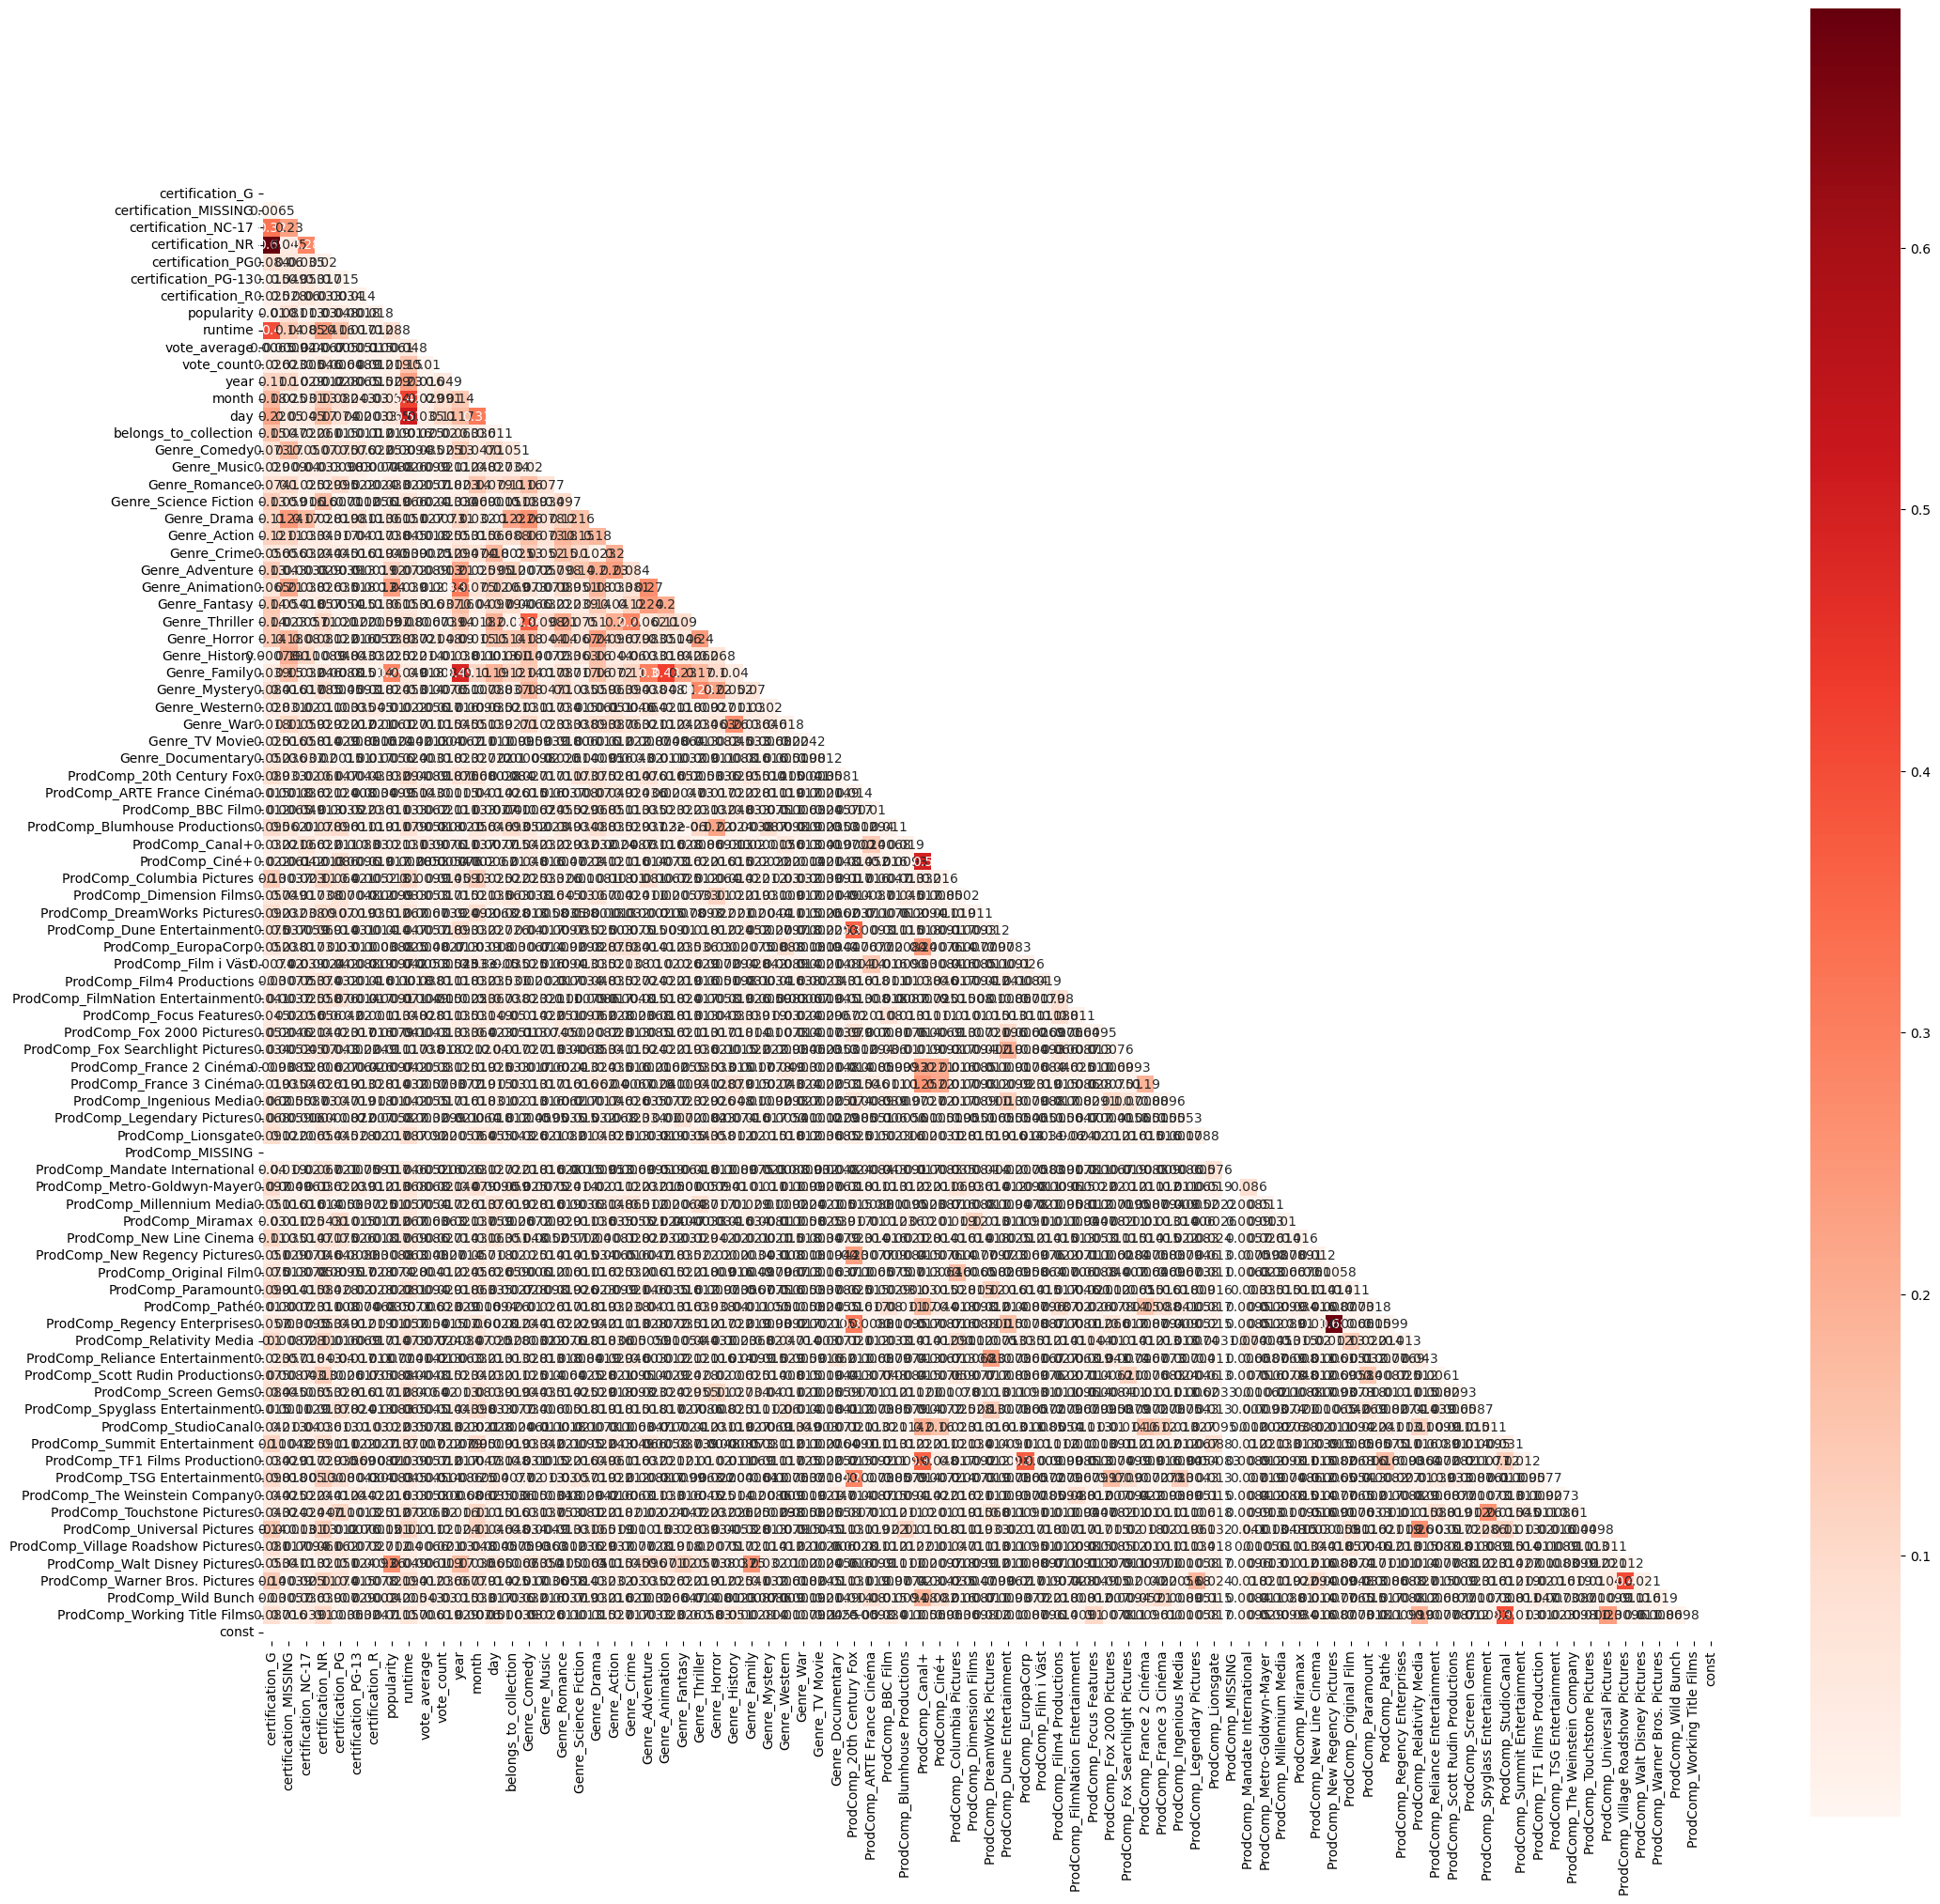

In [106]:
## Calculating the mask to hide the upper-right of the triangle
plt.figure(figsize=(25,25))
corr = X_train_df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

## Variance Inflation Factor

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

certification_G  certification_MISSING  certification_NC-17  \
15073       -13.138792             -31.310685             -6.08063   
55143        14.458208               6.689315              0.31937   
76369        10.098208             -13.310685              1.09937   
18730        -1.121792             -14.310685              0.14037   
18801         1.814208             -26.310685             -0.67663   
...                ...                    ...                  ...   
38810         7.437208             -11.310685             -0.55463   
34910        15.561208               9.689315              0.48137   
44162        -1.811792               8.689315              0.41937   
34612         3.903208             -11.310685              0.32537   
43961         1.775208              -8.310685             -0.18063   

       certification_NR  certification_PG  certification_PG-13  \
15073       -972.267492         -5.661278             5.150796   
55143       1705.732508          4.338722            -3.849204   
76369        454.732508          7.338722            -5.849204   
18730        208.732508         -3.661278             4.150796   
18801       -329.267492         -3.661278             1.150796   
...                 ...               ...                  ...   
38810         92.732508          1.338722             4.150796   
34910       2668.732508          1.338722            -5.849204   
44162       -248.267492          2.338722            -1.849204   
34612       -355.267492          0.338722            -4.849204   
43961       -360.267492          2.338722            -3.849204   

       certification_R  popularity   runtime  vote_average  vote_count  \
15073        -6.401364   -0.011114  0.591311     -0.003284   -0.031321   
55143        -4.401364   -0.011114 -0.408689     -0.003284   -0.031321   
76369         3.598636   -0.011114  0.591311     -0.003284   -0.031321   
18730        -1.401364    0.988886 -0.408689     -0.003284   -0.031321   
18801       -12.401364   -0.011114 -0.408689     -0.003284   -0.031321   
...                ...         ...       ...           ...         ...   
38810       -13.401364   -0.011114 -0.408689     -0.003284   -0.031321   
34910        10.598636   -0.011114 -0.408689     -0.003284   -0.031321   
44162        15.598636   -0.011114  0.591311     -0.003284   -0.031321   
34612       -13.401364   -0.011114 -0.408689     -0.003284   -0.031321   
43961        -0.401364   -0.011114 -0.408689     -0.003284   -0.031321   

           year     month       day  belongs_to_collection  Genre_Comedy  \
15073 -0.069715 -0.203334 -0.272544              -0.161404     -0.372569   
55143 -0.069715 -0.203334  0.727456               0.838596     -0.372569   
76369 -0.069715 -0.203334 -0.272544              -0.161404      0.627431   
18730 -0.069715 -0.203334 -0.272544              -0.161404      0.627431   
18801  0.930285 -0.203334 -0.272544              -0.161404      0.627431   
...         ...       ...       ...                    ...           ...   
38810 -0.069715 -0.203334  0.727456               0.838596     -0.372569   
34910 -0.069715 -0.203334  0.727456              -0.161404     -0.372569   
44162 -0.069715 -0.203334 -0.272544              -0.161404     -0.372569   
34612 -0.069715 -0.203334  0.727456              -0.161404      0.627431   
43961 -0.069715 -0.203334  0.727456              -0.161404     -0.372569   

       Genre_Music  Genre_Romance  Genre_Science Fiction  Genre_Drama  \
15073    -0.028795      -0.191968              -0.066684    -0.536499   
55143    -0.028795      -0.191968              -0.066684    -0.536499   
76369    -0.028795      -0.191968              -0.066684     0.463501   
18730    -0.028795      -0.191968              -0.066684    -0.536499   
18801    -0.028795      -0.191968               0.933316    -0.536499   
...            ...            ...                    ...          ...   
38810    -0.028795      -0.191968              -0.066684    

In [108]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new series to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF

certification_G                   2.721849
certification_MISSING             1.318622
certification_NC-17               1.297441
certification_NR                  2.148524
certification_PG                  1.220822
                                    ...   
ProdComp_Walt Disney Pictures     1.176954
ProdComp_Warner Bros. Pictures    1.328474
ProdComp_Wild Bunch               1.062360
ProdComp_Working Title Films      1.314396
const                                  NaN
Length: 85, dtype: float64

In [109]:
## Sort VIF for inspect
VIF.sort_values()

Genre_TV Movie                    1.012628
Genre_Documentary                 1.023088
certification_R                   1.027485
ProdComp_The Weinstein Company    1.031894
ProdComp_Millennium Media         1.033205
                                    ...   
month                                  inf
vote_average                           inf
day                                    inf
ProdComp_MISSING                       NaN
const                                  NaN
Length: 85, dtype: float64

In [110]:
## Set float format to view vals not in scientfic notation
pd.set_option('display.float_format',lambda x: f'{x:.2f}')

In [111]:
## remove infinite values from VIF and sort
VIF = VIF[VIF!=np.inf].sort_values()
VIF

Genre_TV Movie                   1.01
Genre_Documentary                1.02
certification_R                  1.03
ProdComp_The Weinstein Company   1.03
ProdComp_Millennium Media        1.03
                                 ... 
ProdComp_Regency Enterprises     2.01
certification_NR                 2.15
certification_G                  2.72
ProdComp_MISSING                  NaN
const                             NaN
Length: 78, dtype: float64

In [112]:
## filter for VIF that are > 5
VIF[VIF>5]

Series([], dtype: float64)

In [113]:
high_vif = VIF[VIF>5].index
high_vif

Index([], dtype='object')

### FInal Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     67.90
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:49:22   Log-Likelihood:                -73297.
No. Observations:                3959   AIC:                         1.468e+05
Df Residuals:                    3876   BIC:                         1.473e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     8.909e+05   6.85e+04     13.007      0.000    7.57e+05    1.03e+06
certification_MISSING               2.097e+05   2.65e+04      7.912      0.000    1.58e+05    2.62e+05
certification_NC-17                -9.465e+05   3.69e+05     -2.562      0.010   -1.67e+06   -2.22e+05
certification_NR                    1.096e+04    415.274     26.397      0.000    1.01e+04    1.18e+04
certification_PG                   -6.323e+05   8.42e+04     -7.505      0.000   -7.97e+05   -4.67e+05
certification_PG-13                -5859.7500   1.25e+05     -0.047      0.963   -2.51e+05     2.4e+05
certification_R                    -3621.5207   5.03e+04     -0.072      0.943   -1.02e+05    9.51e+04
popularity                          1.647e+08   2.14e+07      7.687      0.000    1.23e+08    2.07e+08
runtime                             1.544e+08   2.13e+07      7.233      0.000    1.13e+08    1.96e+08
vote_average                        1.489e+08   2.29e+07      6.498      0.000    1.04e+08    1.94e+08
vote_count                          1.557e+08   2.13e+07      7.299      0.000    1.14e+08    1.98e+08
year                                1.639e+08   2.12e+07      7.718      0.000    1.22e+08    2.06e+08
month                               1.625e+08   2.12e+07      7.675      0.000    1.21e+08    2.04e+08
day                                  1.48e+08   2.12e+07      6.992      0.000    1.07e+08     1.9e+08
belongs_to_collection               1.101e+07   1.22e+06      9.016      0.000    8.62e+06    1.34e+07
Genre_Comedy                         3.55e+06    1.1e+06      3.238      0.001     1.4e+06     5.7e+06
Genre_Music                         4.074e+06   2.64e+06      1.542      0.123   -1.11e+06    9.26e+06
Genre_Romance                       9.077e+05    1.2e+06      0.755      0.451   -1.45e+06    3.27e+06
Genre_Science Fiction              -1.004e+07   1.82e+06     -5.525      0.000   -1.36e+07   -6.48e+06
Genre_Drama                        -4.733e+06   1.08e+06     -4.374      0.000   -6.85e+06   -2.61e+06
Genre_Action                        1.842e+06   1.23e+06      1.502      0.133   -5.63e+05    4.25e+06
Genre_Crime                          1.14e+06   1.35e+06      0.842      0.400   -1.52e+06    3.79e+06
Genre_Adventure                    -3.893e+05   1.47e+06     -0.266      0.791   -3.26e+06    2.48e+06
Genre_Animation                     3.039e+06    2.5e+06      1.214      0.225   -1.87e+06    7.95e+06
Genre_Fantasy                      -4.727e+05   1.74e+06     -0.271      0.786   -3.89e+06    2.95e+06
Genre_Thriller                      3.391e+05   1.21e+06      0.281      0.779   -2.03e+06     2.7e+06
Genre_Horror                       -1.939e+06   1.63e+06     -1.188      0.235   -5.14e+06    1.

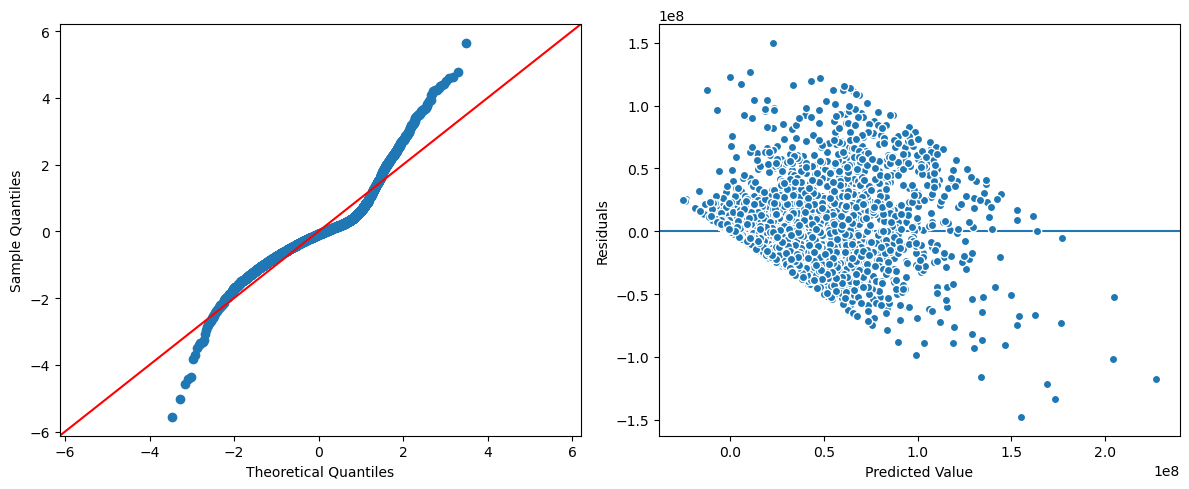

In [114]:
## make new df_final copy of prev df
df_final = df_clean_iqr.drop(columns =high_vif).copy()
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_final)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [115]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.590
Testing R^2: 0.572


### Visualizing Coeffiicents

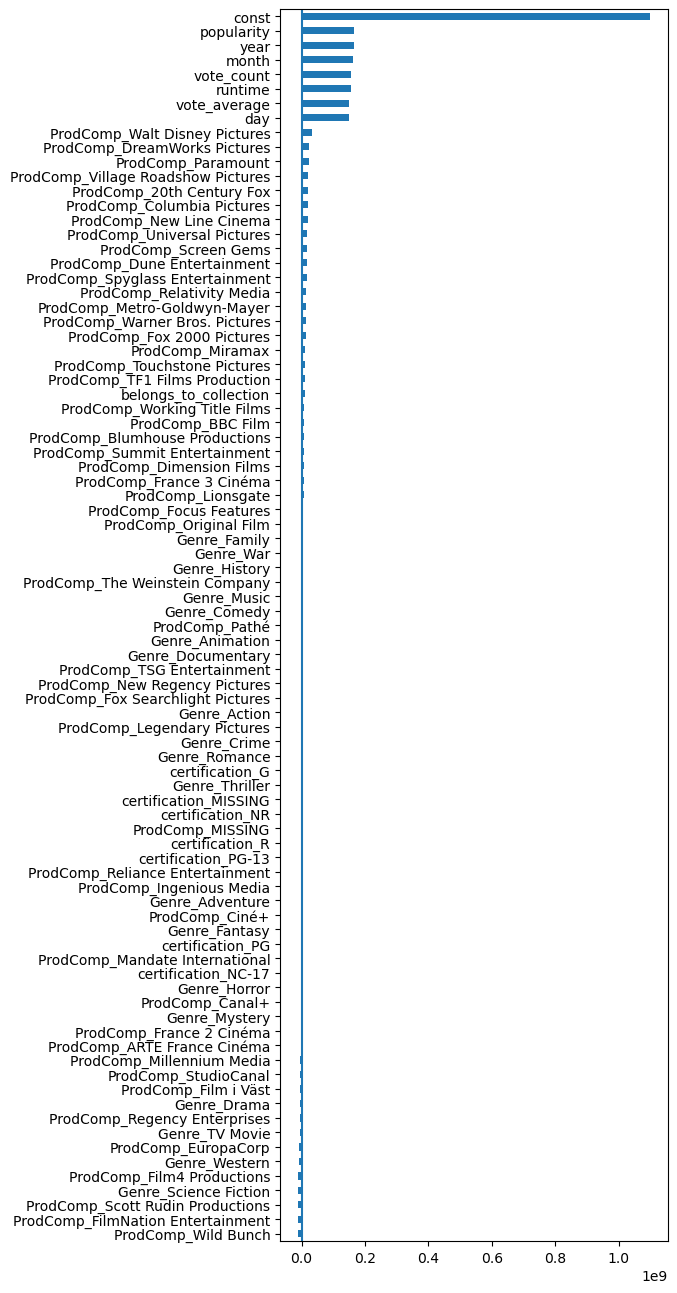

In [116]:
plt.figure(figsize=(5,16))
ax =result.params.sort_values().plot(kind='barh')
ax.axvline()

## Comparing Linear Reg to RandomForest

In [117]:
from sklearn.ensemble import RandomForestRegressor
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

reg = RandomForestRegressor(verbose=1,random_state=42)
reg.fit(X_train_df, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


RandomForestRegressor(random_state=42, verbose=1)

In [118]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = reg.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = reg.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.972
Testing R^2: 0.766


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


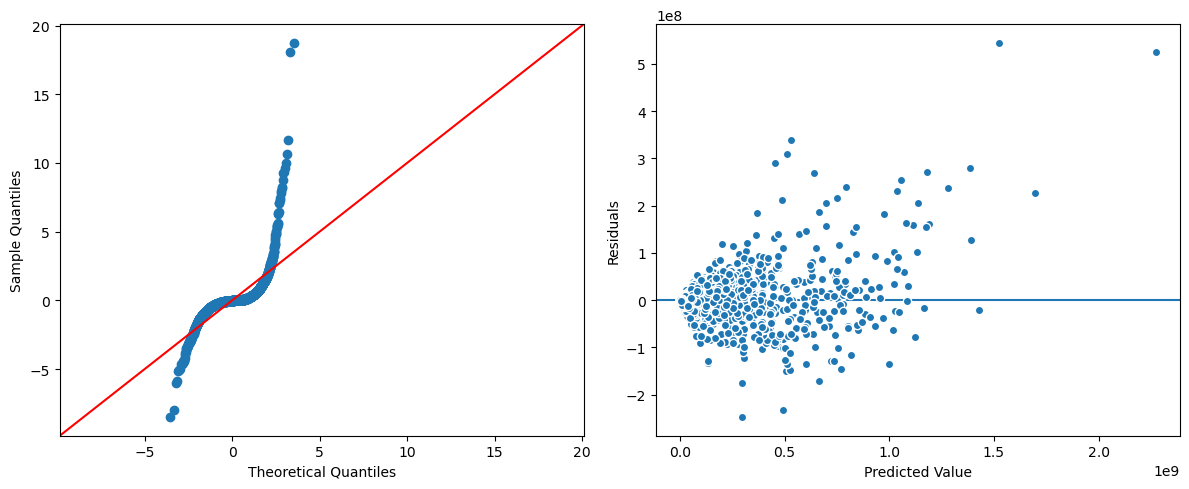

In [119]:
evaluate_ols(reg, X_train_df, y_train)

<Axes: >

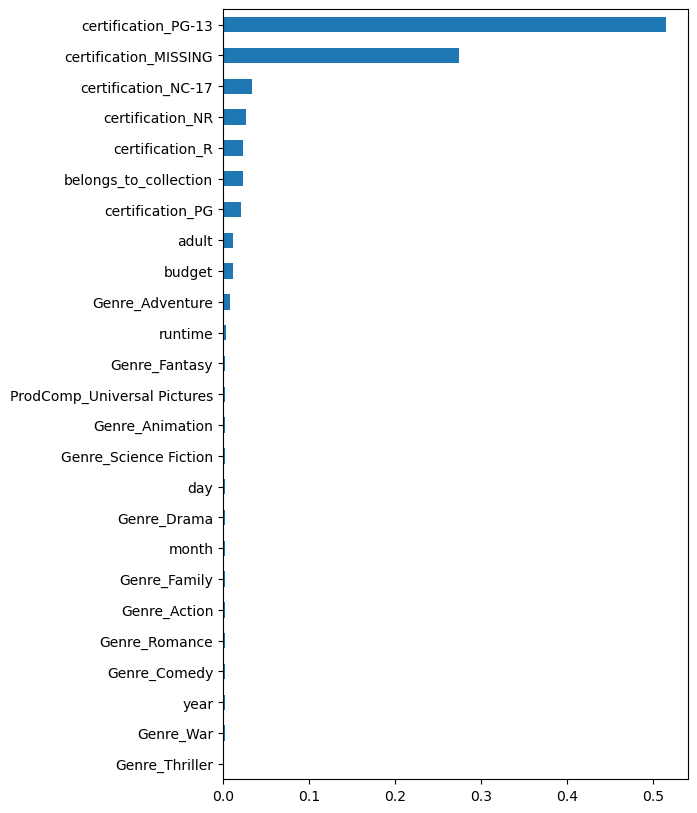

In [120]:
importances = pd.Series(reg.feature_importances_, index=X_train_df.columns)
importances.sort_values().tail(25).plot(kind='barh',figsize=(6,10))

# Summary

- Diagnosing linear regression models is an iterative process that can drive you mad if you let it. 

- Our final model is "good enough" for me to extract some business recommendations. 